In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed

from skimage import morphology, io, color, filters
from skimage import img_as_ubyte
from skimage.measure import label, regionprops

import os
os.chdir("../")
from Sources.tools import *

# Data Loading

In [3]:
breast_images = load_images()
infos_df = load_infos()

100%|██████████| 322/322 [00:01<00:00, 232.66it/s]


In [100]:
image = breast_images[6]

# Data pre processing

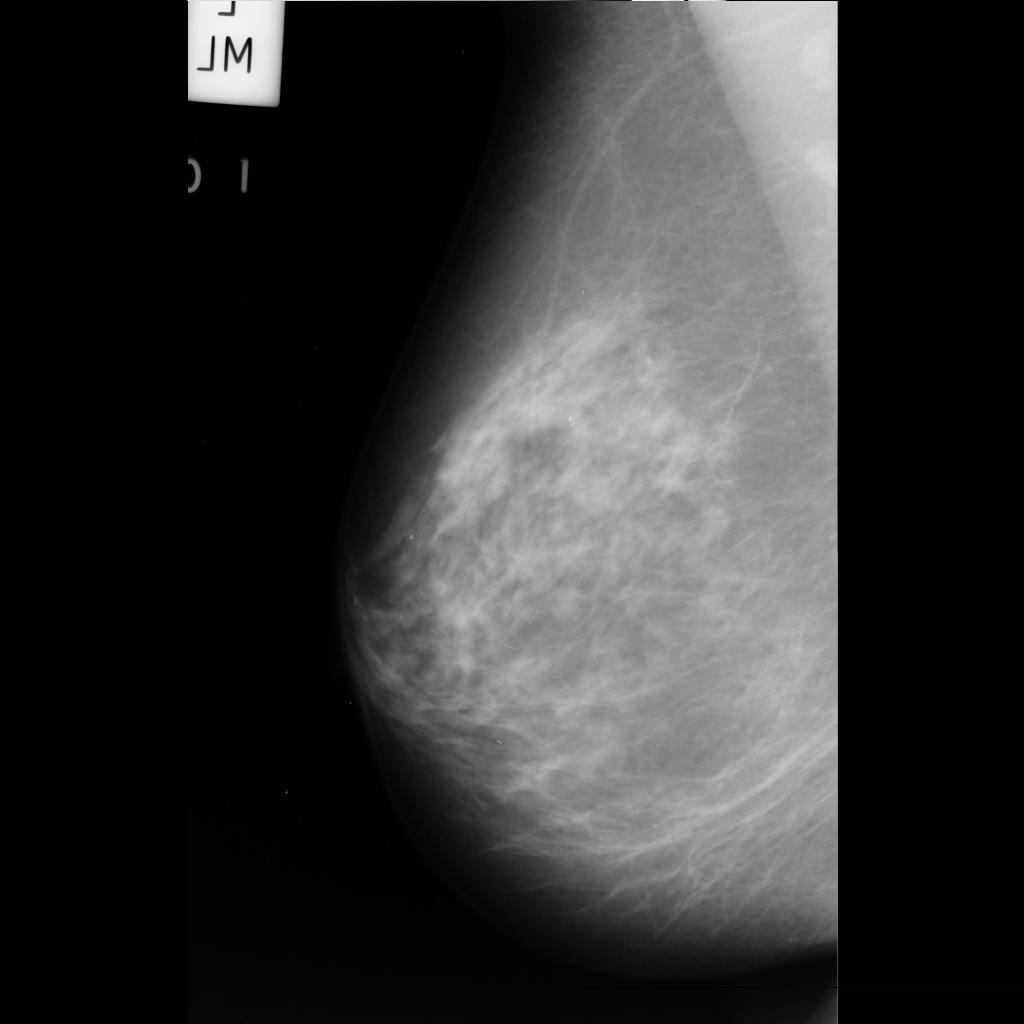

In [101]:
image

In [102]:
thresh = 20  # Seuil entre 0 et 255, ajustez selon vos besoins
binary_image = image.point(lambda p: 255 if p > thresh else 0)

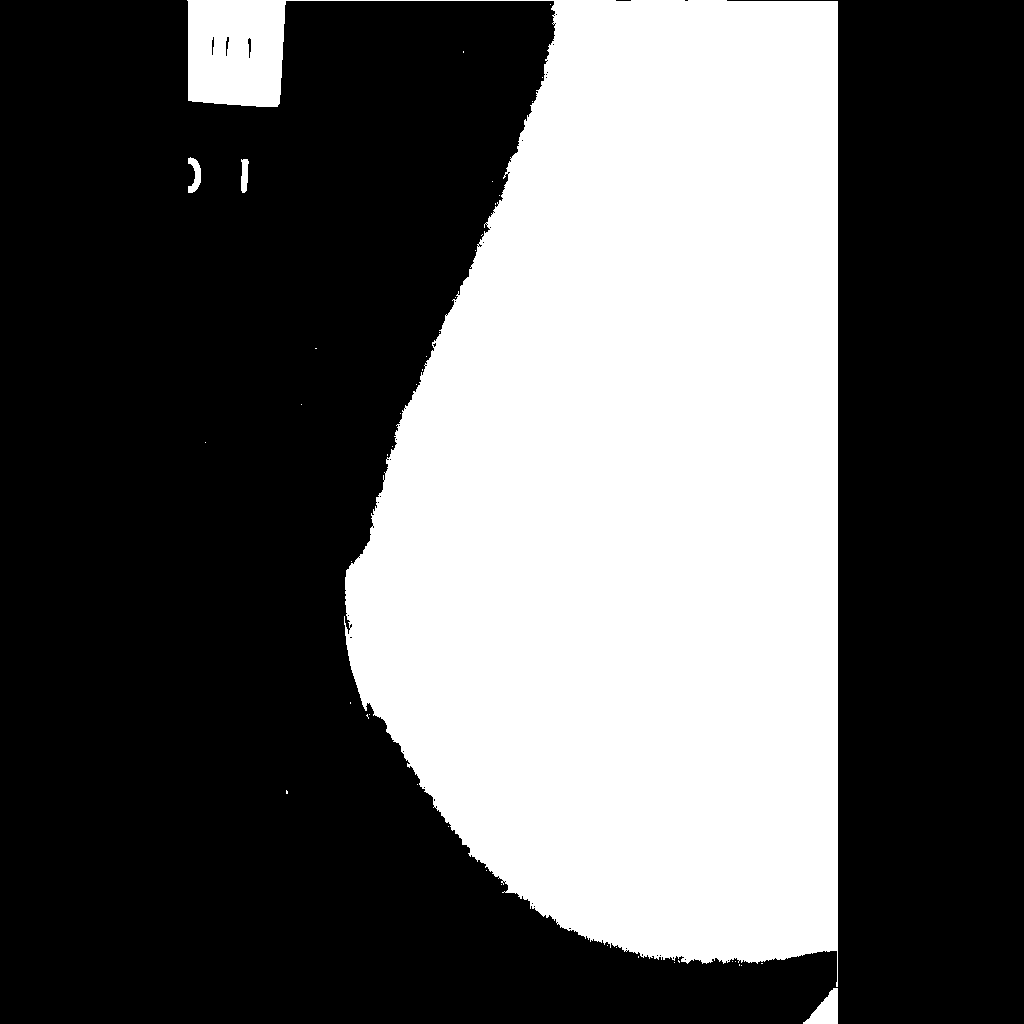

In [103]:
binary_image

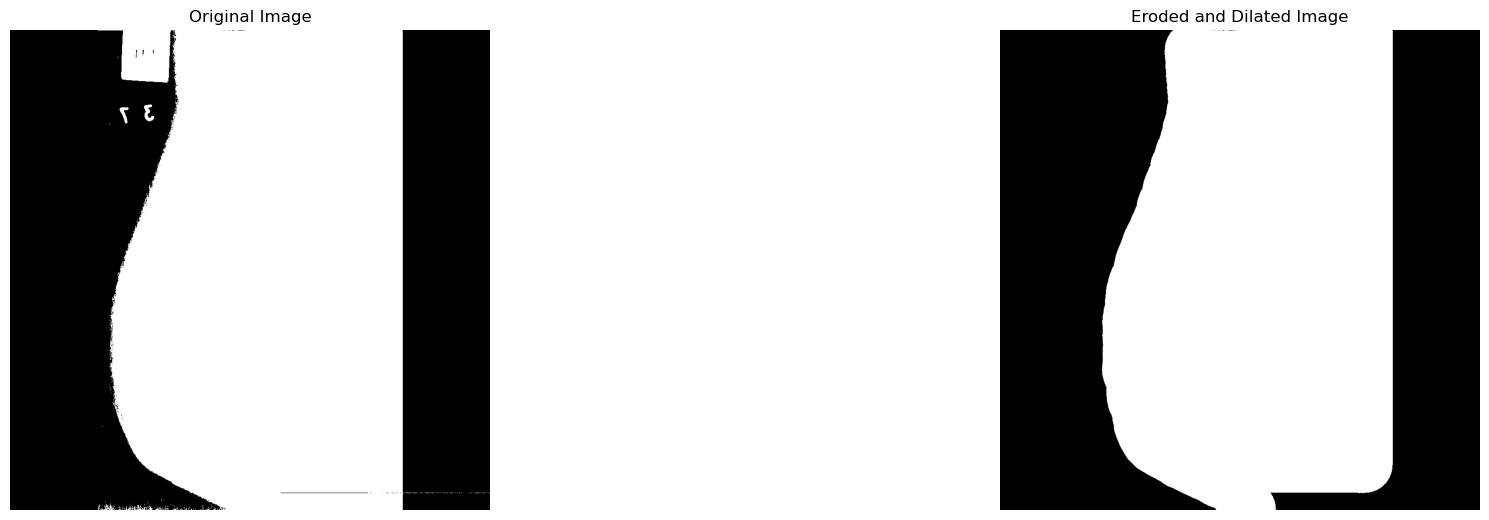

In [45]:
binary_image = np.array(binary_image)

# Convert to a binary mask (True for 255, False for 0)
binary_mask = binary_image > 0

# Apply erosion and dilation
selem1 = morphology.disk(60)  # Structuring element, here a 3x3 square
eroded_image = morphology.erosion(binary_mask, selem1)
selem2 = morphology.disk(60)
dilated_image = morphology.dilation(eroded_image, selem2)

# Convert the binary results back to an image
dilated_image = img_as_ubyte(dilated_image)

# Show the results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Dilated image
plt.subplot(1, 3, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Eroded and Dilated Image')
plt.axis('off')

plt.tight_layout()
plt.show()

C:\Users\planc\AppData\Local\Temp\ipykernel_25224\7122659.py:11: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem1 = morphology.square(100)  # Structuring element, here a 3x3 square


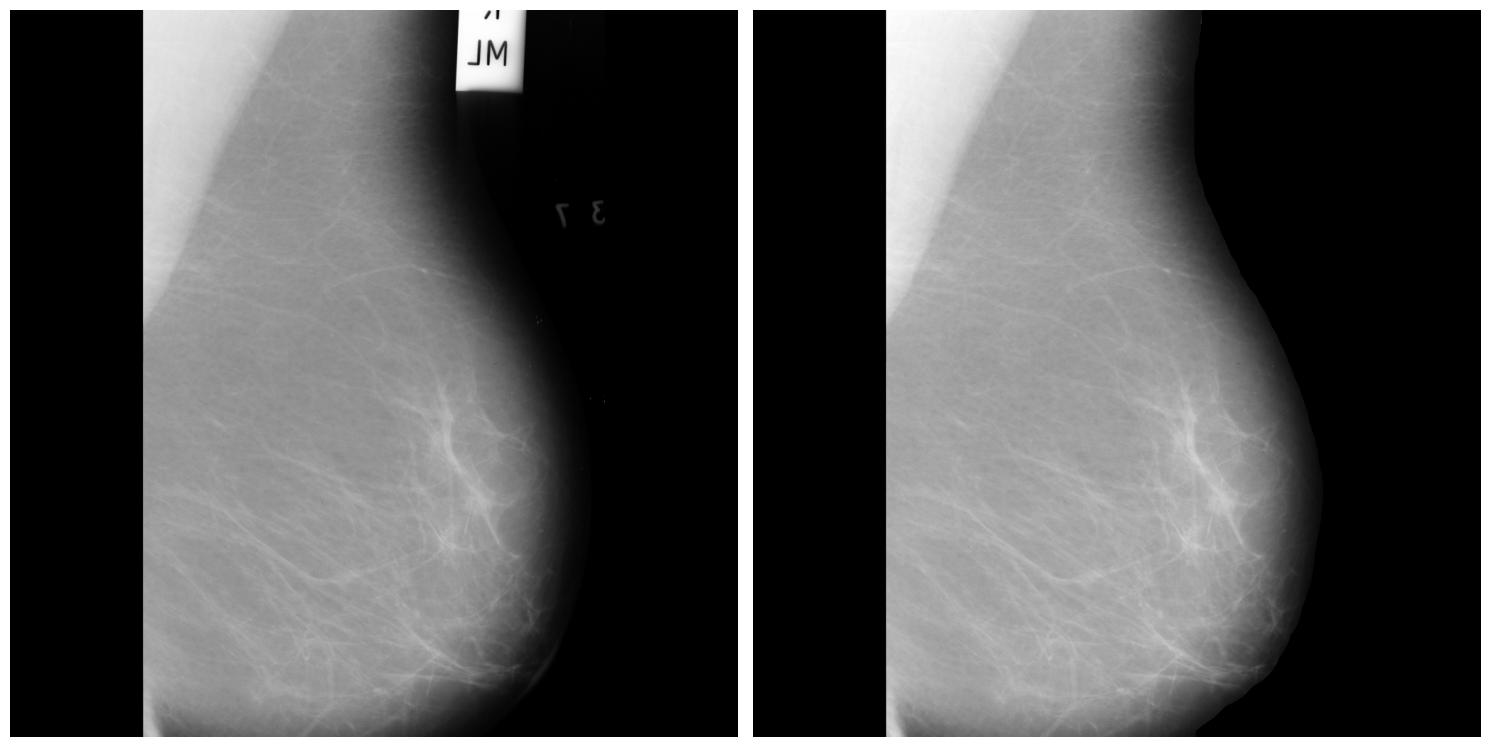

In [203]:
image = breast_images[5]
thresh = 20  # Seuil entre 0 et 255, ajustez selon vos besoins
binary_image = image.point(lambda p: 255 if p > thresh else 0)

binary_image = np.array(binary_image)

# Convert to a binary mask (True for 255, False for 0)
binary_mask = binary_image > 0

# Apply erosion and dilation
selem1 = morphology.square(100)  # Structuring element, here a 3x3 square
eroded_image = morphology.erosion(binary_mask, selem1)
selem2 = morphology.disk(70)
dilated_image = morphology.dilation(eroded_image, selem2)

# selem3 = morphology.disk(70)  # Erase white bands
# eroded_image = morphology.erosion(dilated_image, selem3)
# dilated_image = morphology.dilation(eroded_image, selem3)


# Convert the binary results back to an image
dilated_image = img_as_ubyte(dilated_image)

image = np.array(image)

# Convert dilated image to mask (True for dilated, False for everything else)
dilated_mask = dilated_image > 0

# Apply the mask to the original image (use the dilated_mask to select areas)
masked_image = np.zeros_like(image)
masked_image[dilated_mask] = image[dilated_mask]

# Convert the result back to an image (if needed)
masked_image = img_as_ubyte(masked_image)


plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.imshow(np.array(image), cmap="grey")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(masked_image, cmap="grey")
plt.axis('off')

plt.tight_layout()
plt.show()

C:\Users\planc\AppData\Local\Temp\ipykernel_25224\1146781351.py:11: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem1 = morphology.square(80)  # Structuring element, here a 3x3 square


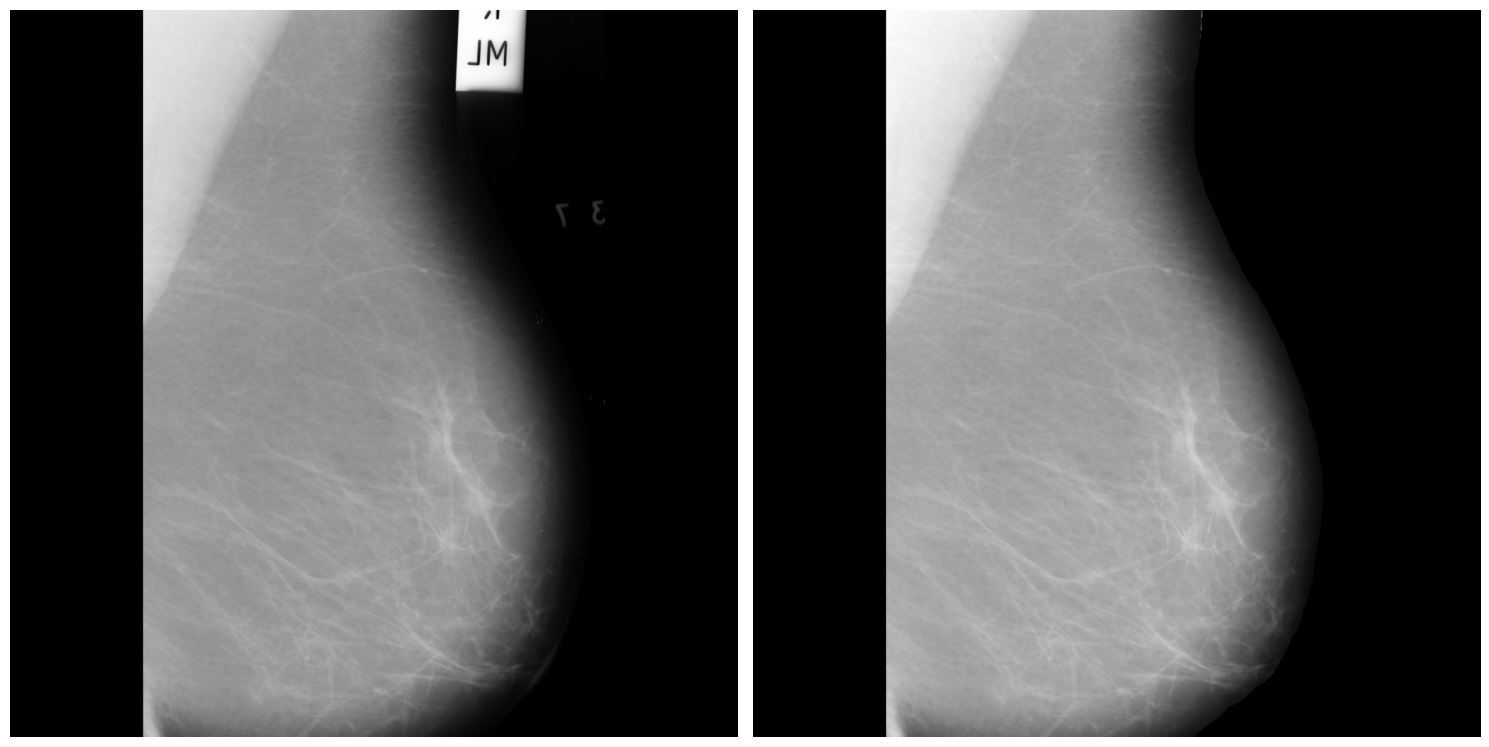

In [202]:
image = breast_images[5]
thresh = 20  # Seuil entre 0 et 255, ajustez selon vos besoins
binary_image = image.point(lambda p: 255 if p > thresh else 0)

binary_image = np.array(binary_image)

# Convert to a binary mask (True for 255, False for 0)
binary_mask = binary_image > 0

# Apply erosion and dilation
selem1 = morphology.square(80)  # Structuring element, here a 3x3 square
eroded_image = morphology.erosion(binary_mask, selem1)
selem2 = morphology.disk(60)
dilated_image = morphology.dilation(eroded_image, selem2)

selem3 = morphology.disk(70)  # Erase white bands
eroded_image = morphology.erosion(dilated_image, selem3)
dilated_image = morphology.dilation(eroded_image, selem3)


# Convert the binary results back to an image
dilated_image = img_as_ubyte(dilated_image)

image = np.array(image)

# Convert dilated image to mask (True for dilated, False for everything else)
dilated_mask = dilated_image > 0

# Apply the mask to the original image (use the dilated_mask to select areas)
masked_image = np.zeros_like(image)
masked_image[dilated_mask] = image[dilated_mask]

# Convert the result back to an image (if needed)
masked_image = img_as_ubyte(masked_image)


plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.imshow(np.array(image), cmap="grey")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(masked_image, cmap="grey")
plt.axis('off')

plt.tight_layout()
plt.show()

In [208]:
def remove_label(image):    

    thresh = 20  # Seuil entre 0 et 255, ajustez selon vos besoins
    binary_image = image.point(lambda p: 255 if p > thresh else 0)

    image = np.array(image)
    binary_image = np.array(binary_image)

    # Convert to a binary mask (True for 255, False for 0)
    binary_mask = binary_image > 0

    # # Apply erosion and dilation
    # selem1 = morphology.square(80)  # Structuring element, here a 3x3 square
    # eroded_image = morphology.erosion(binary_mask, selem1)
    # selem2 = morphology.disk(60)
    # dilated_image = morphology.dilation(eroded_image, selem2)

    # selem3 = morphology.disk(70)  # Erase white bands
    # eroded_image = morphology.erosion(dilated_image, selem3)
    # dilated_image = morphology.dilation(eroded_image, selem3)

    # Apply erosion and dilation
    selem1 = morphology.square(100)  # Structuring element, here a 3x3 square
    eroded_image = morphology.erosion(binary_mask, selem1)
    selem2 = morphology.disk(70)
    dilated_image = morphology.dilation(eroded_image, selem2)
    
    # Convert the binary results back to an image
    dilated_image = img_as_ubyte(dilated_image)

    # Convert dilated image to mask (True for dilated, False for everything else)
    dilated_mask = dilated_image > 0

    # Apply the mask to the original image (use the dilated_mask to select areas)
    masked_image = np.zeros_like(image)
    masked_image[dilated_mask] = image[dilated_mask]

    # Convert the result back to an image (if needed)
    masked_image = img_as_ubyte(masked_image)

    return masked_image

  0%|          | 0/15 [00:00<?, ?it/s]C:\Users\planc\AppData\Local\Temp\ipykernel_25224\698964495.py:13: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem1 = morphology.square(80)  # Structuring element, here a 3x3 square


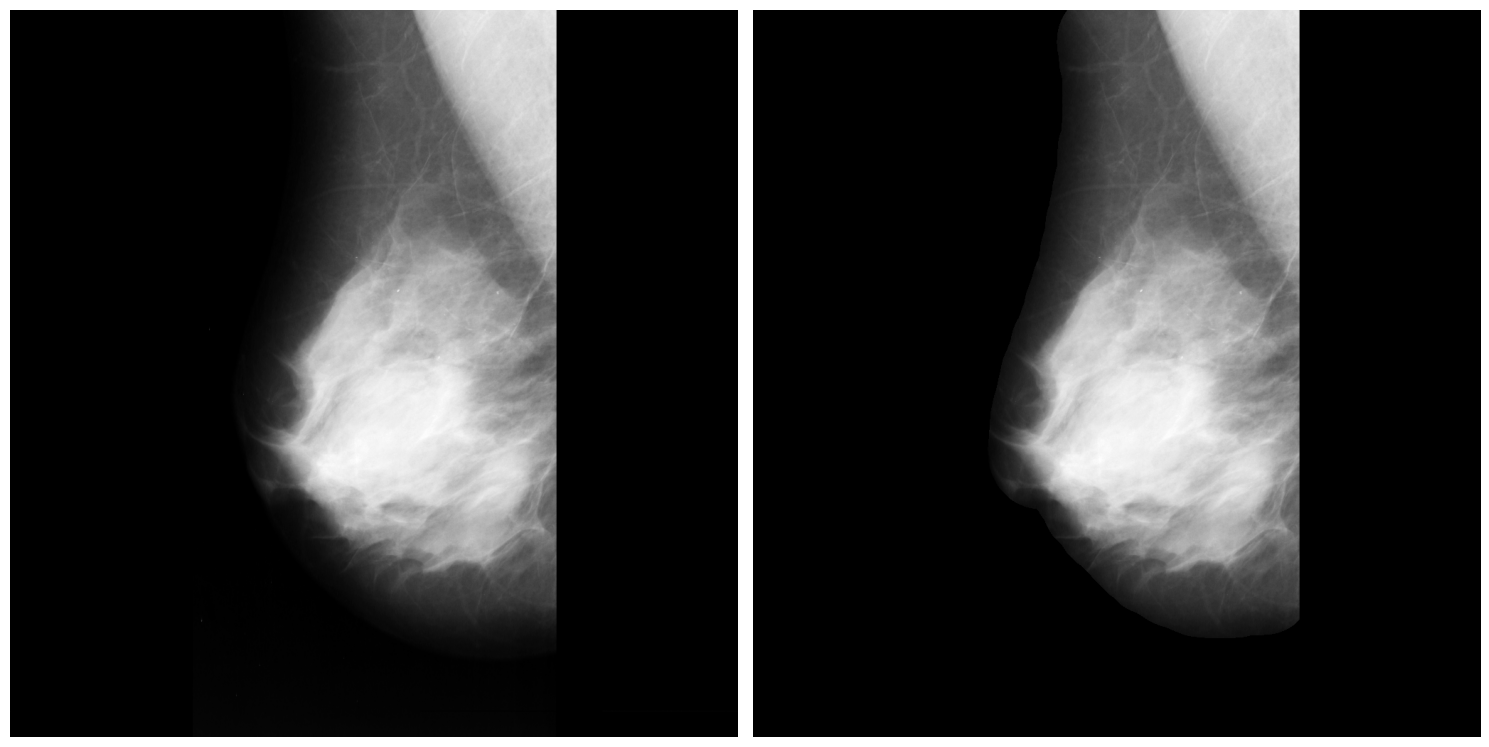

  7%|▋         | 1/15 [00:32<07:39, 32.82s/it]

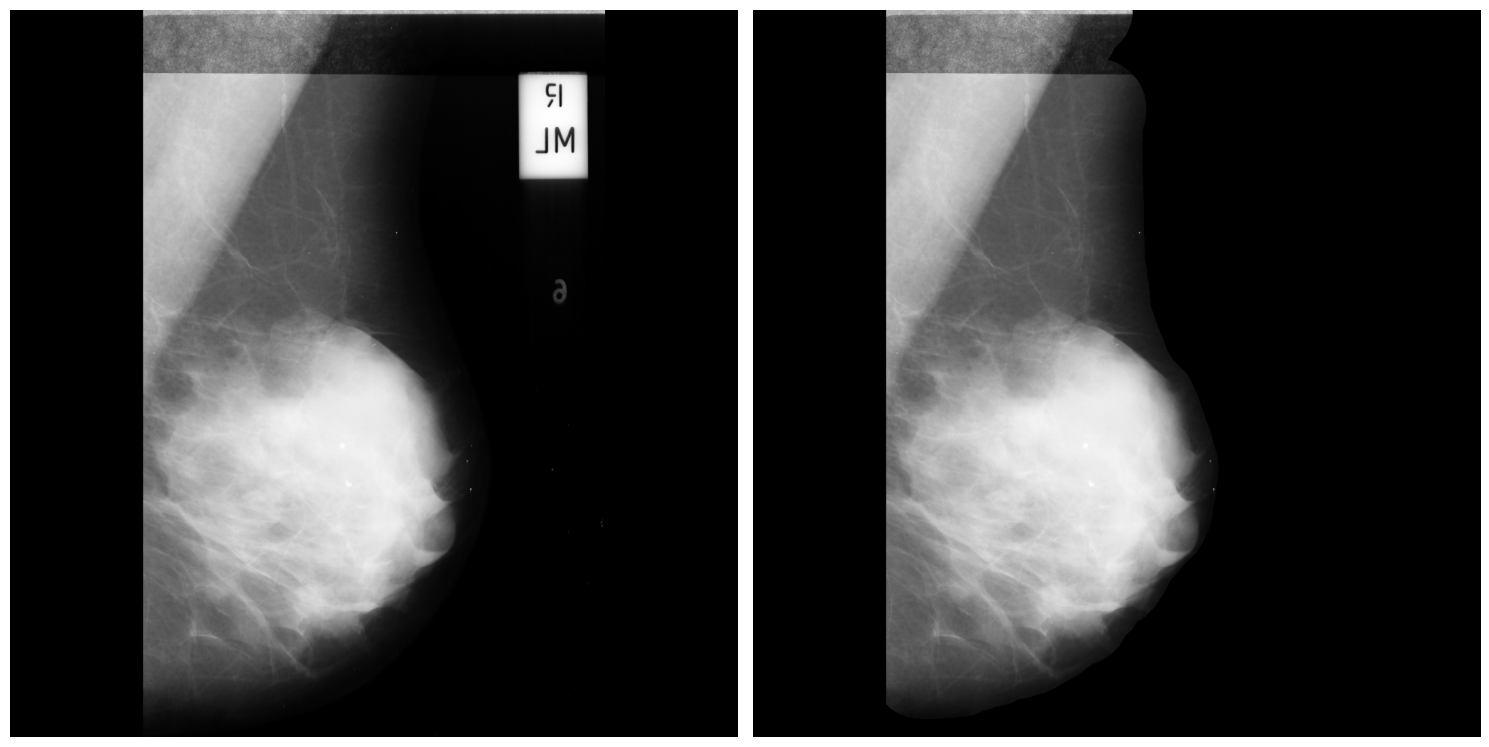

 13%|█▎        | 2/15 [01:05<07:06, 32.84s/it]

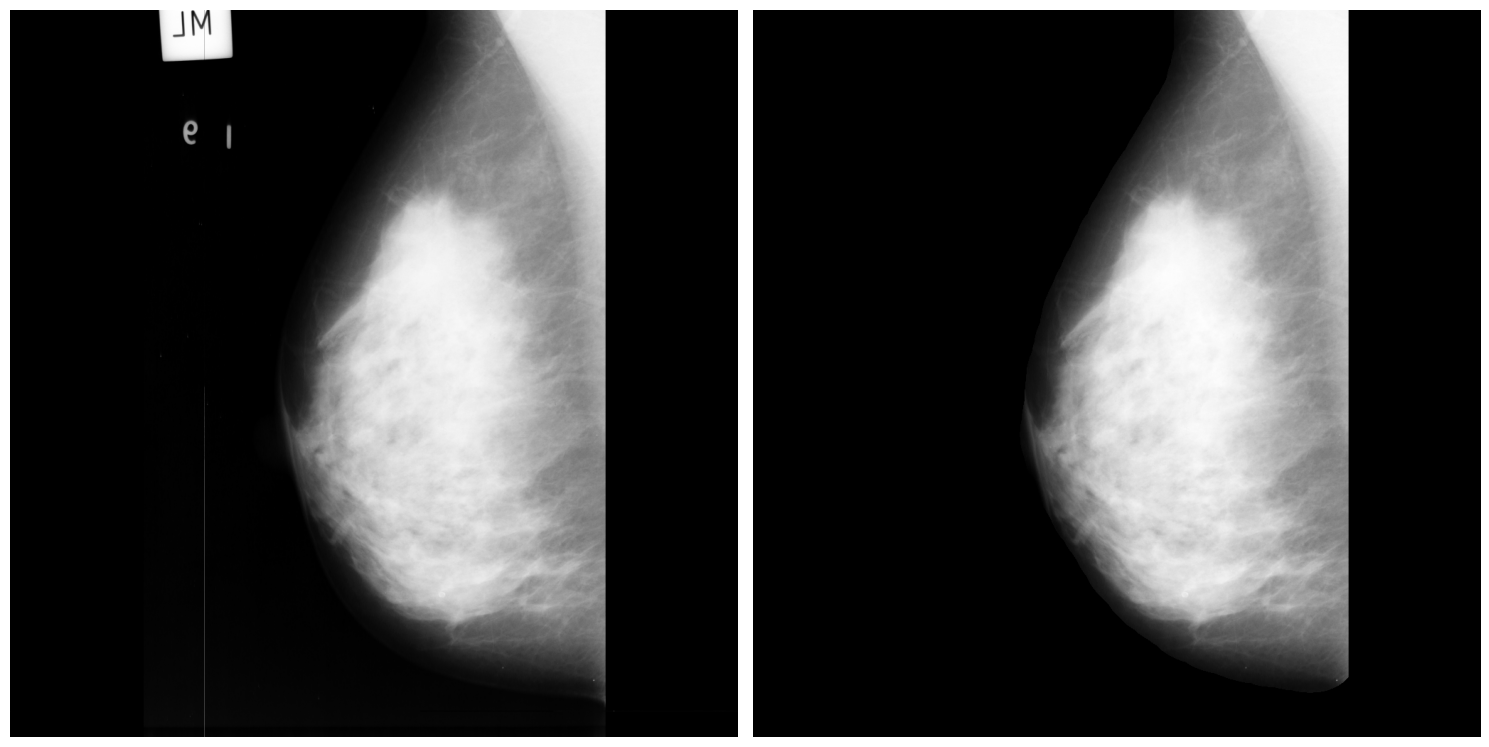

 20%|██        | 3/15 [01:38<06:34, 32.84s/it]

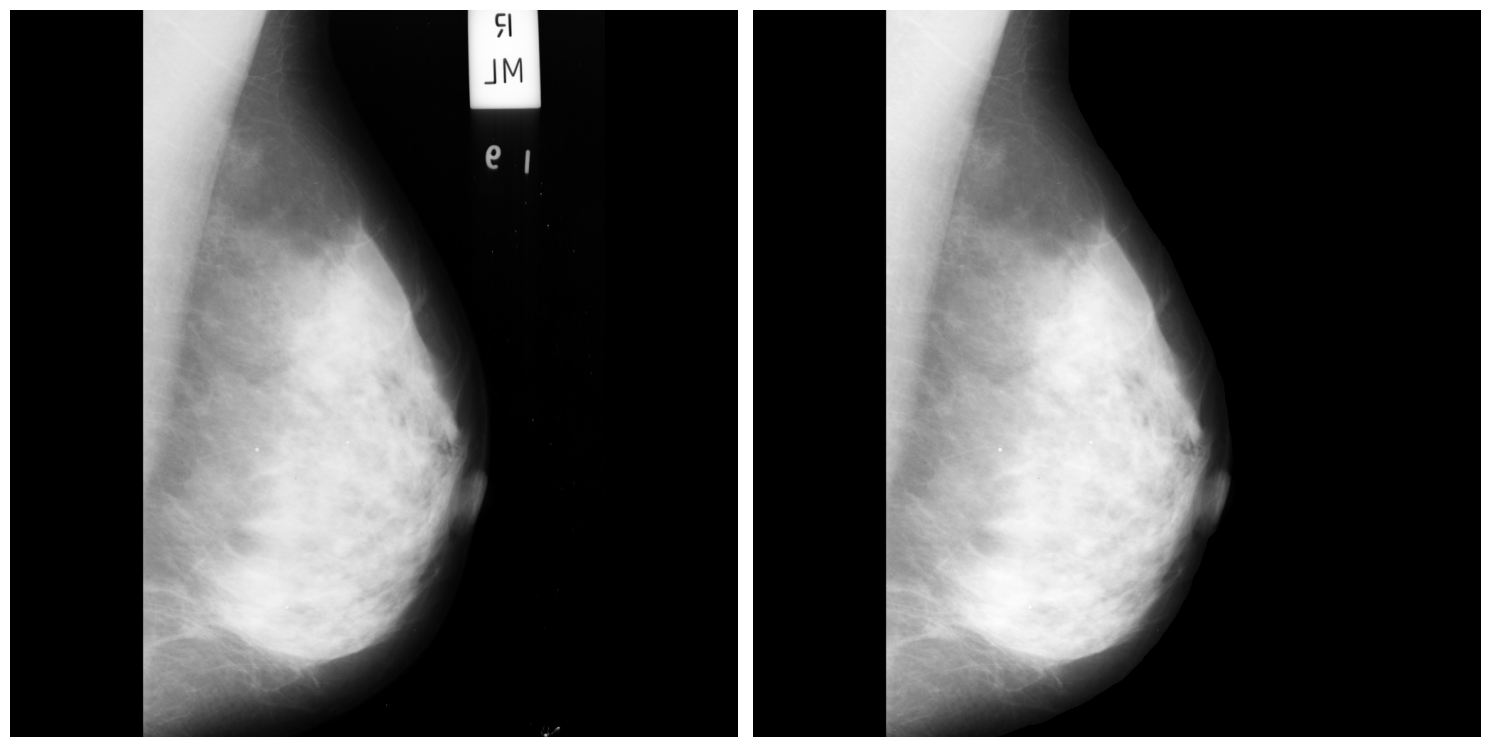

 27%|██▋       | 4/15 [02:11<06:01, 32.86s/it]

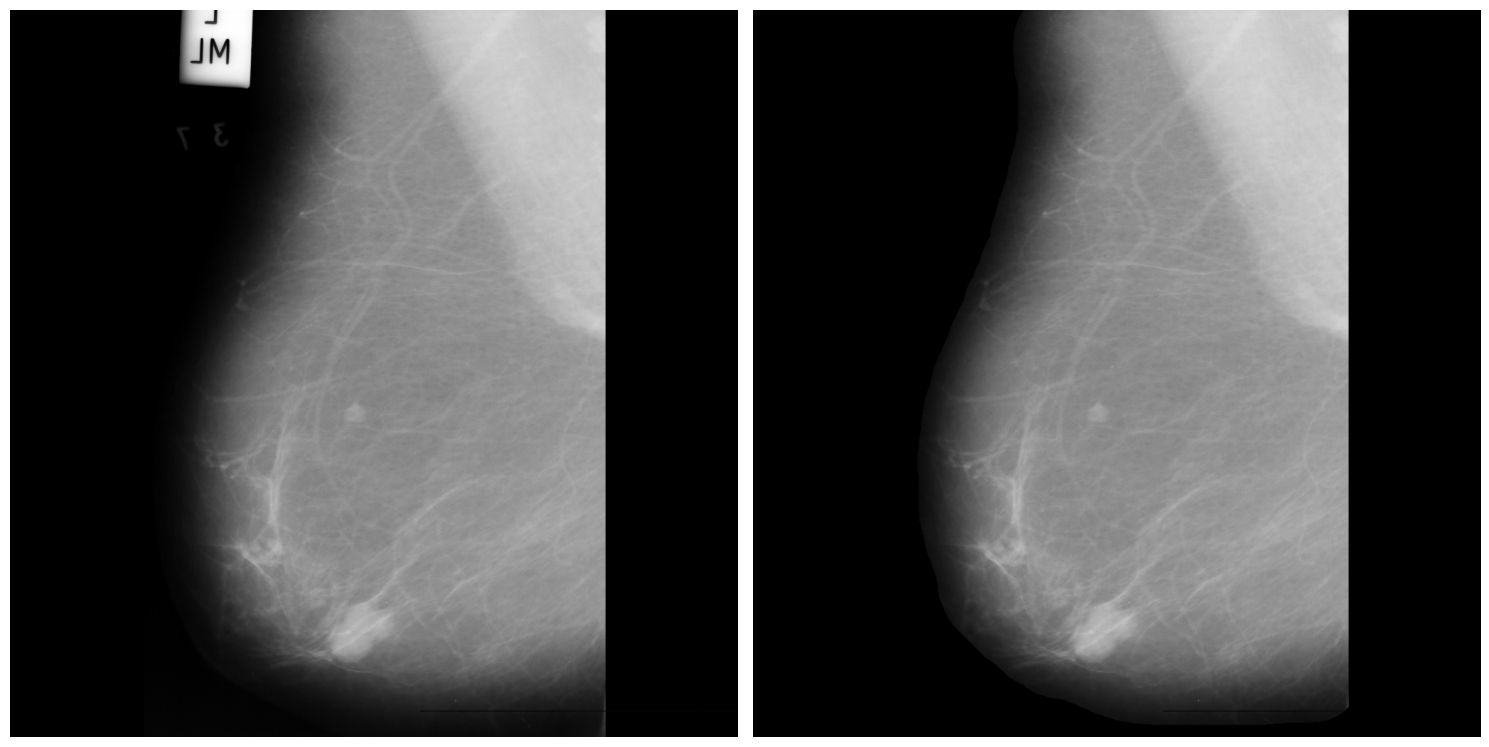

 33%|███▎      | 5/15 [02:44<05:28, 32.89s/it]

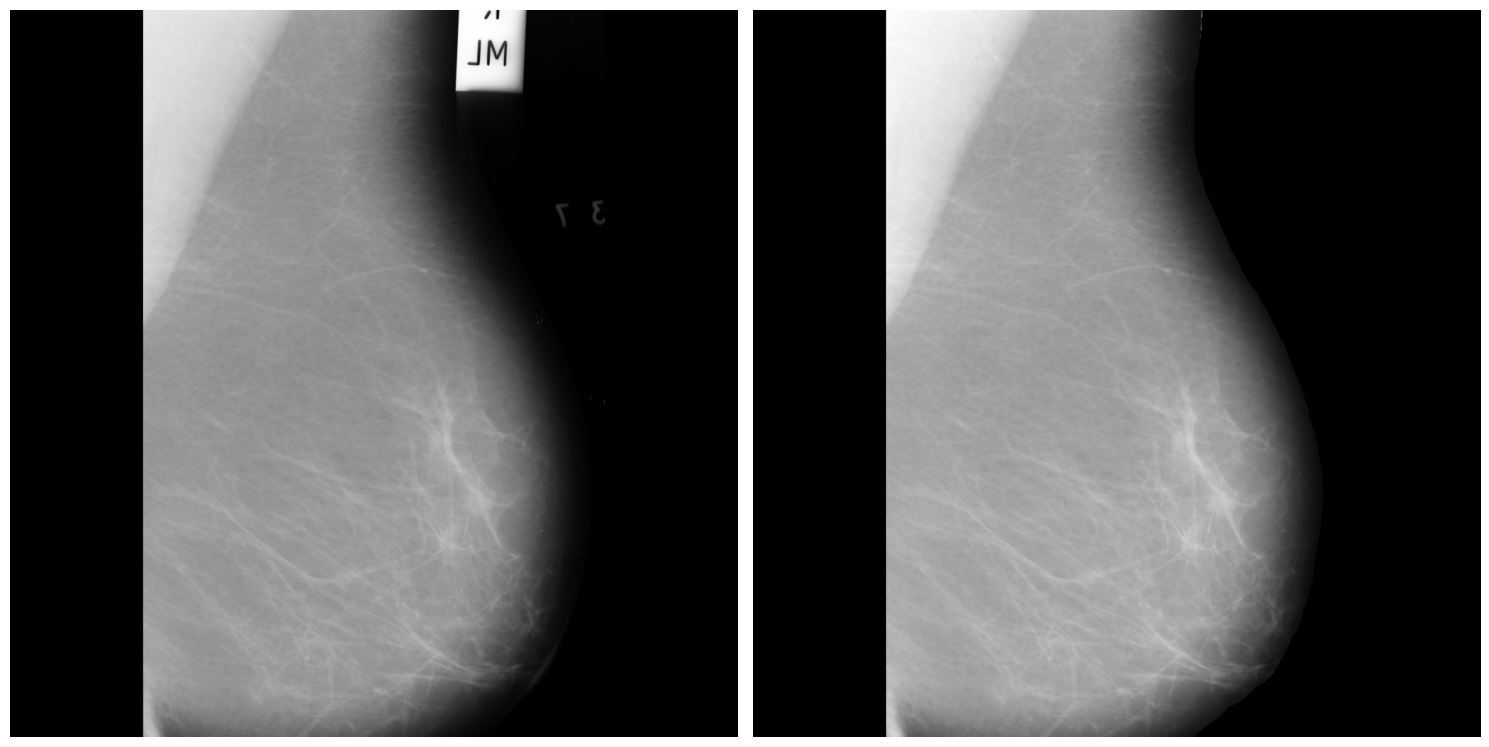

 40%|████      | 6/15 [03:17<04:56, 32.98s/it]

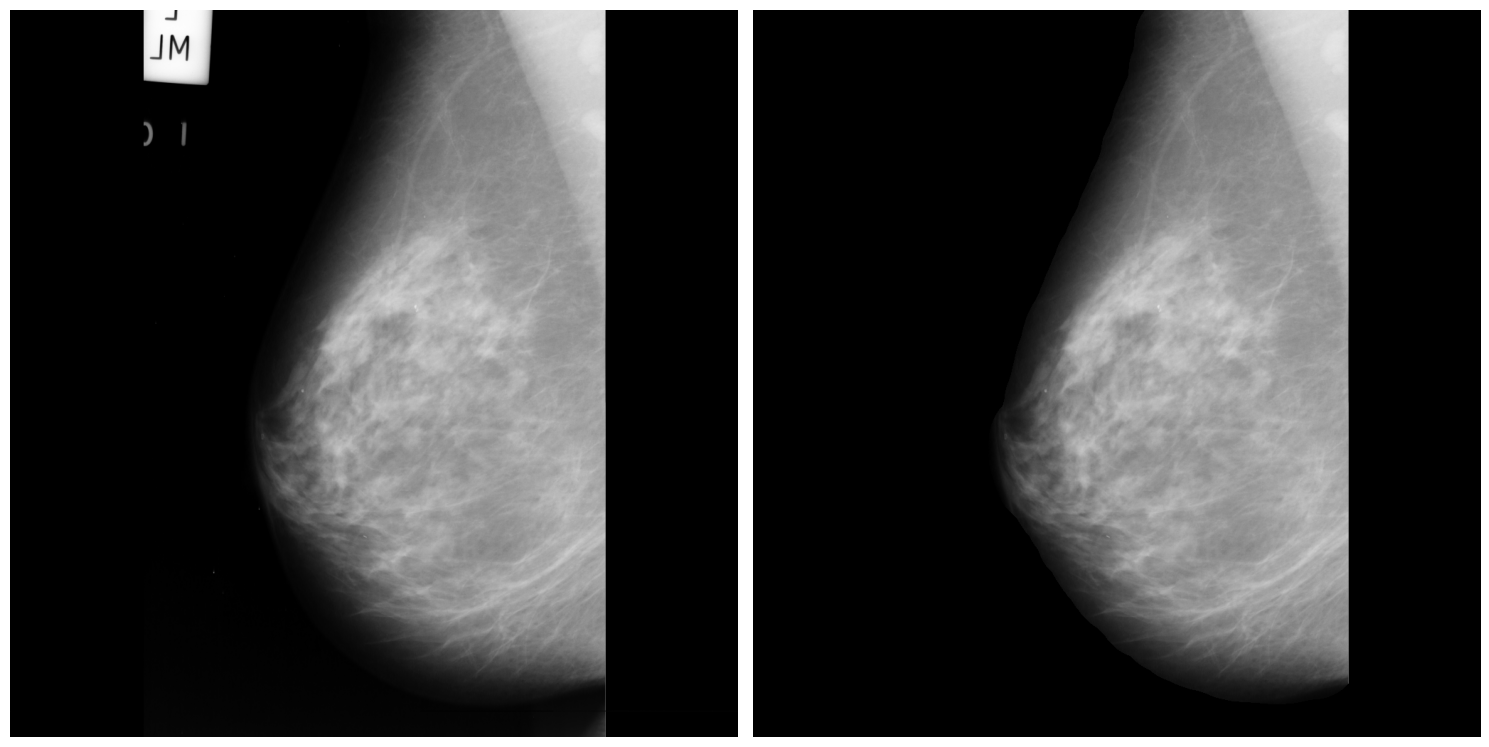

 47%|████▋     | 7/15 [03:50<04:24, 33.09s/it]

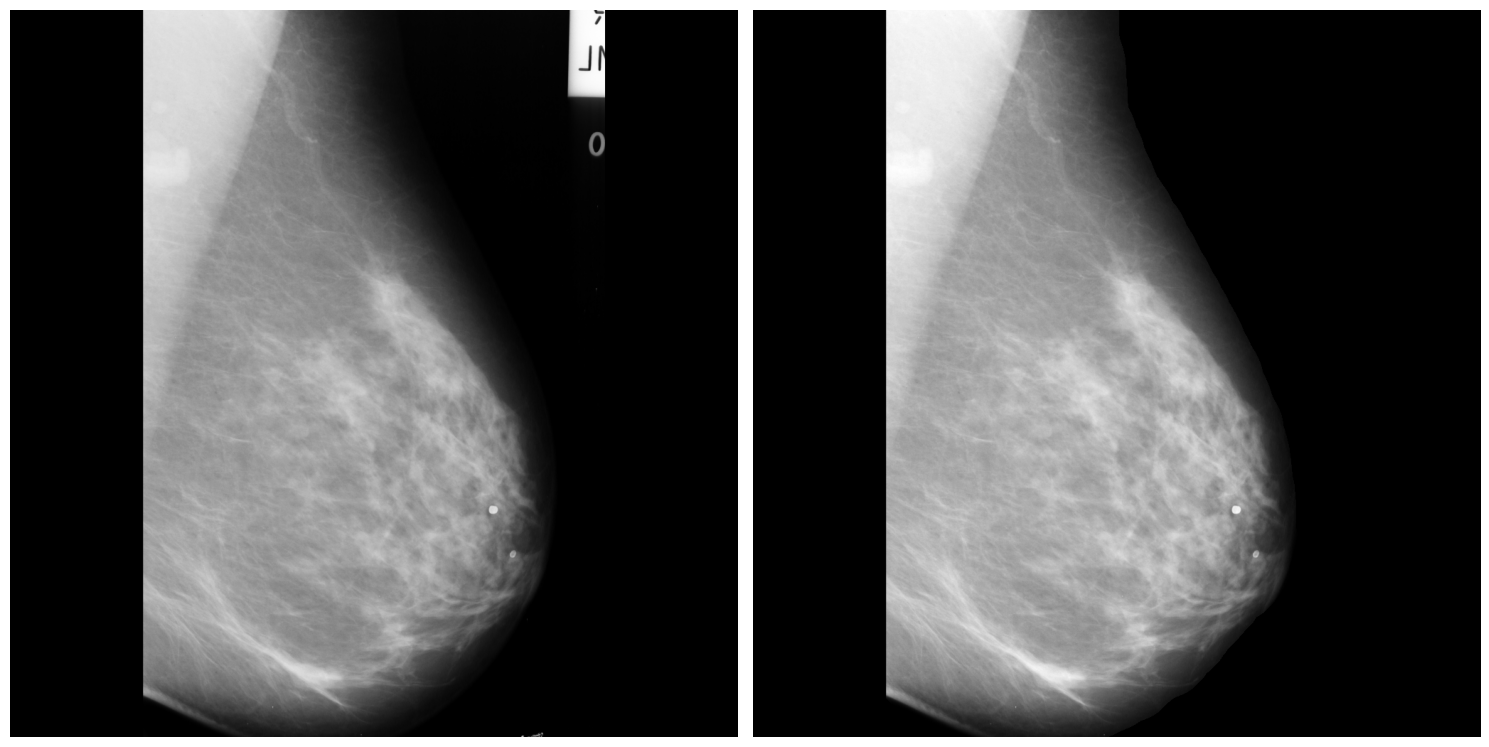

 53%|█████▎    | 8/15 [04:27<04:00, 34.36s/it]

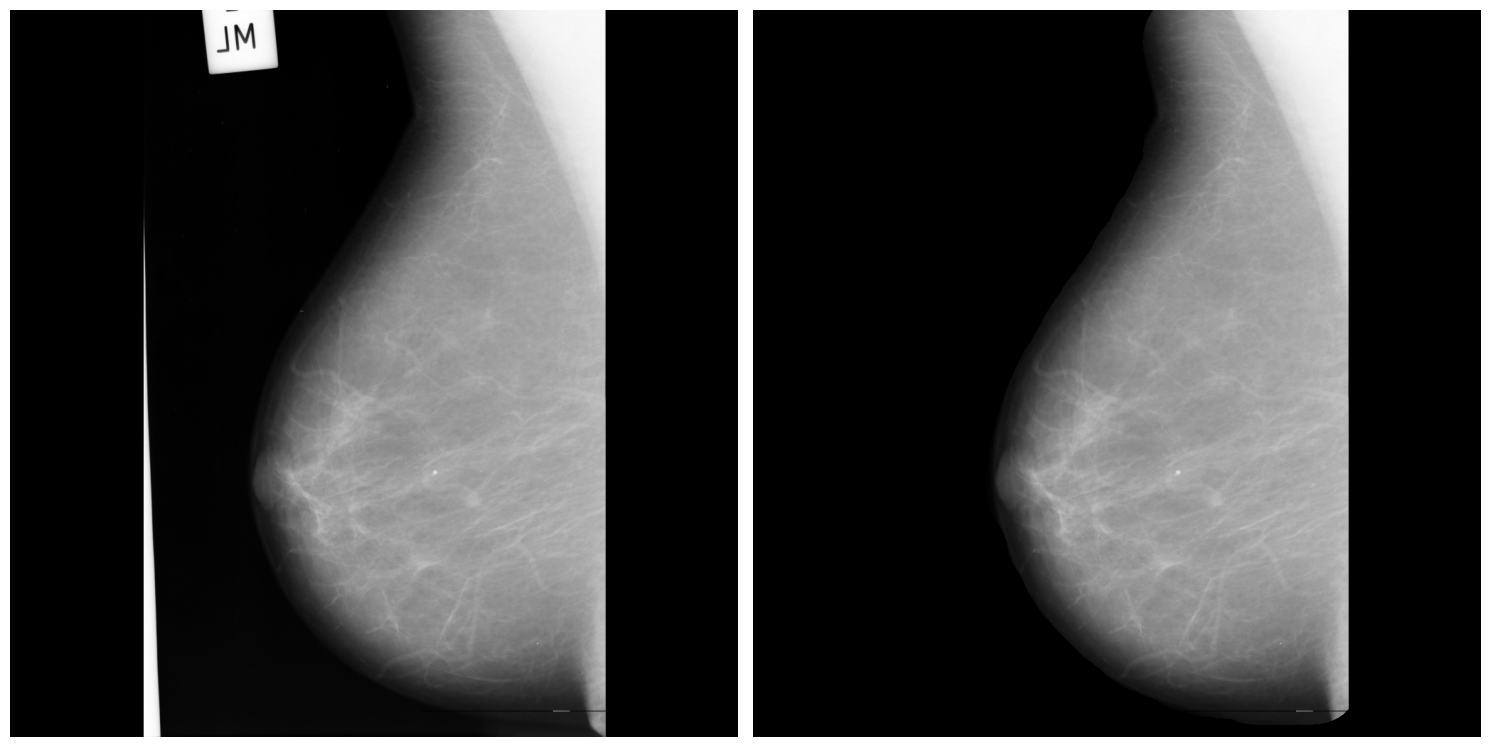

 60%|██████    | 9/15 [05:03<03:27, 34.64s/it]

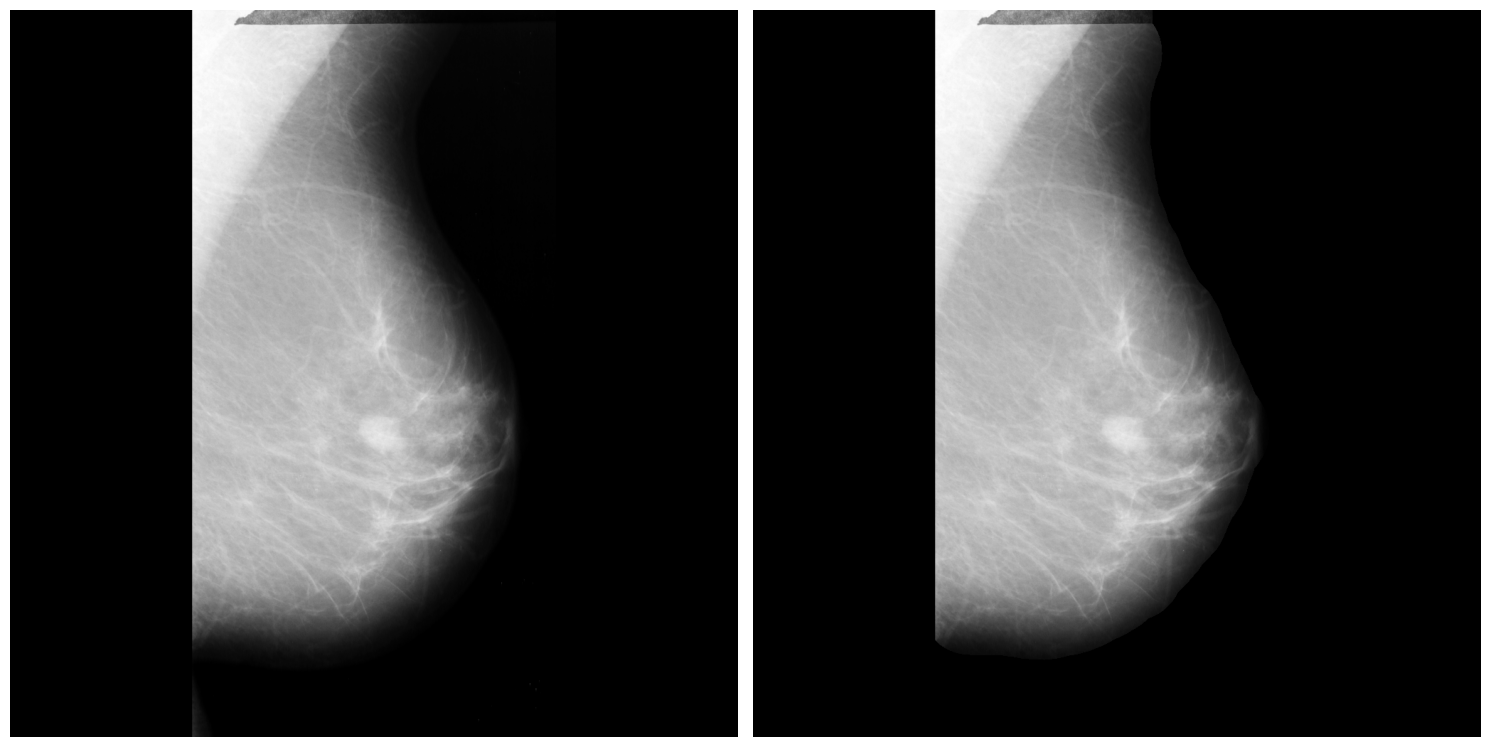

 67%|██████▋   | 10/15 [05:37<02:52, 34.58s/it]

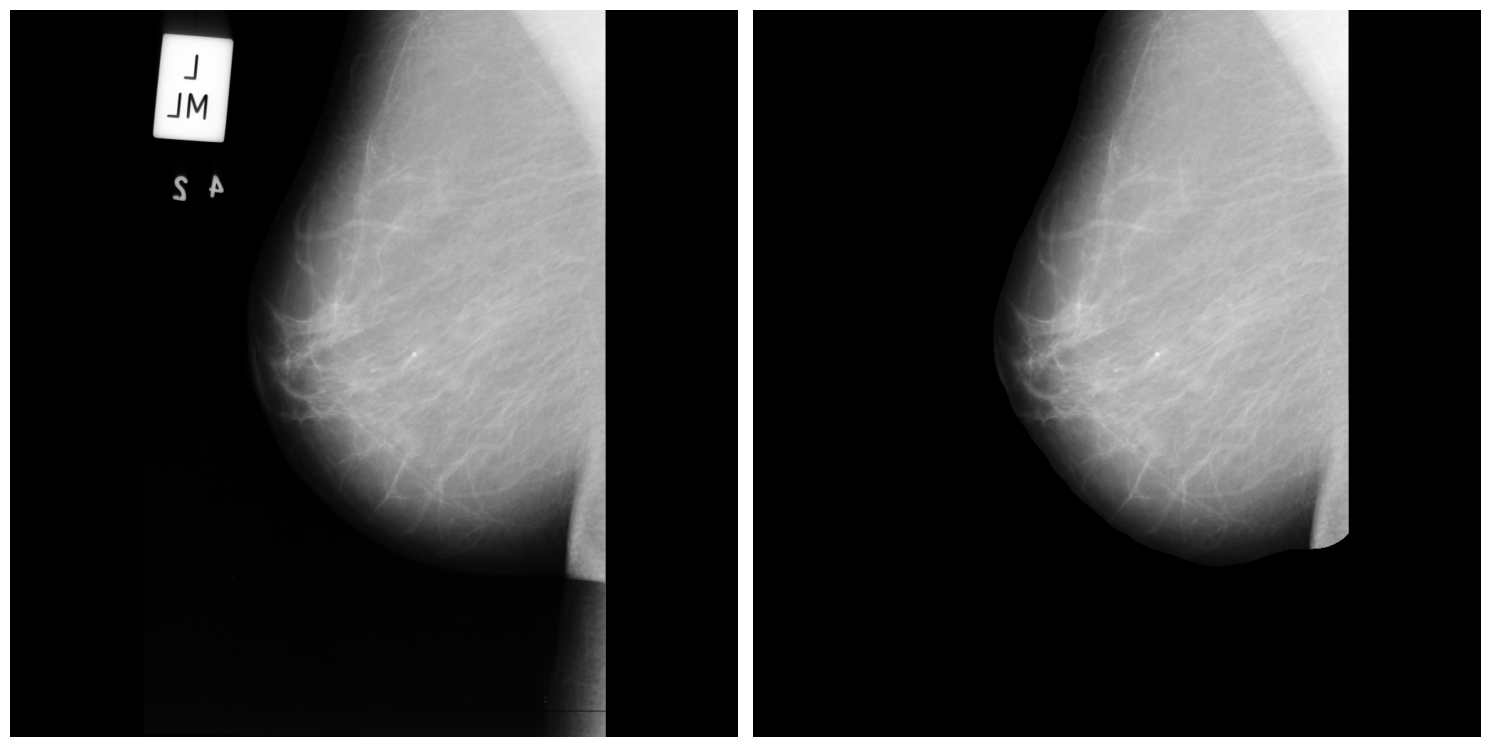

 73%|███████▎  | 11/15 [06:12<02:19, 34.81s/it]

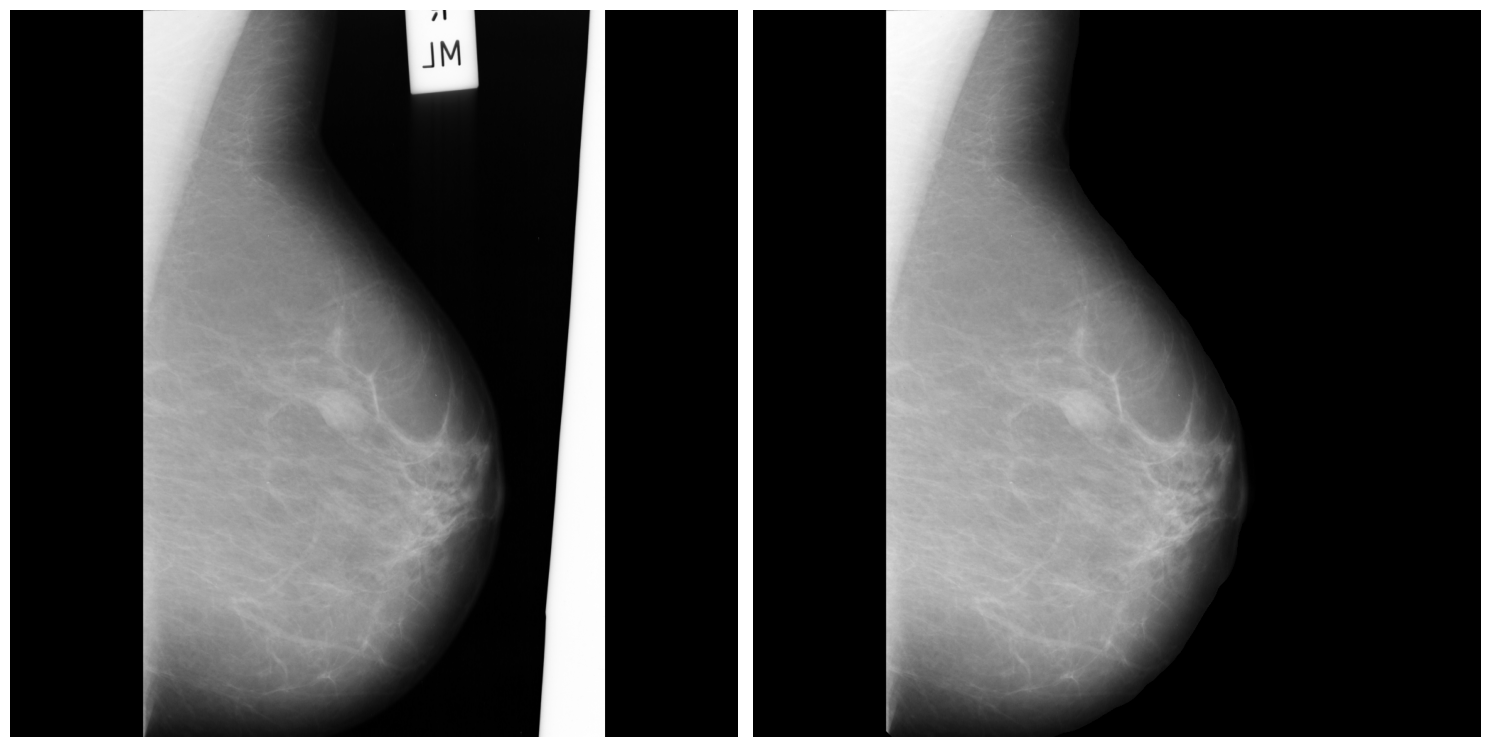

 80%|████████  | 12/15 [06:48<01:44, 34.98s/it]

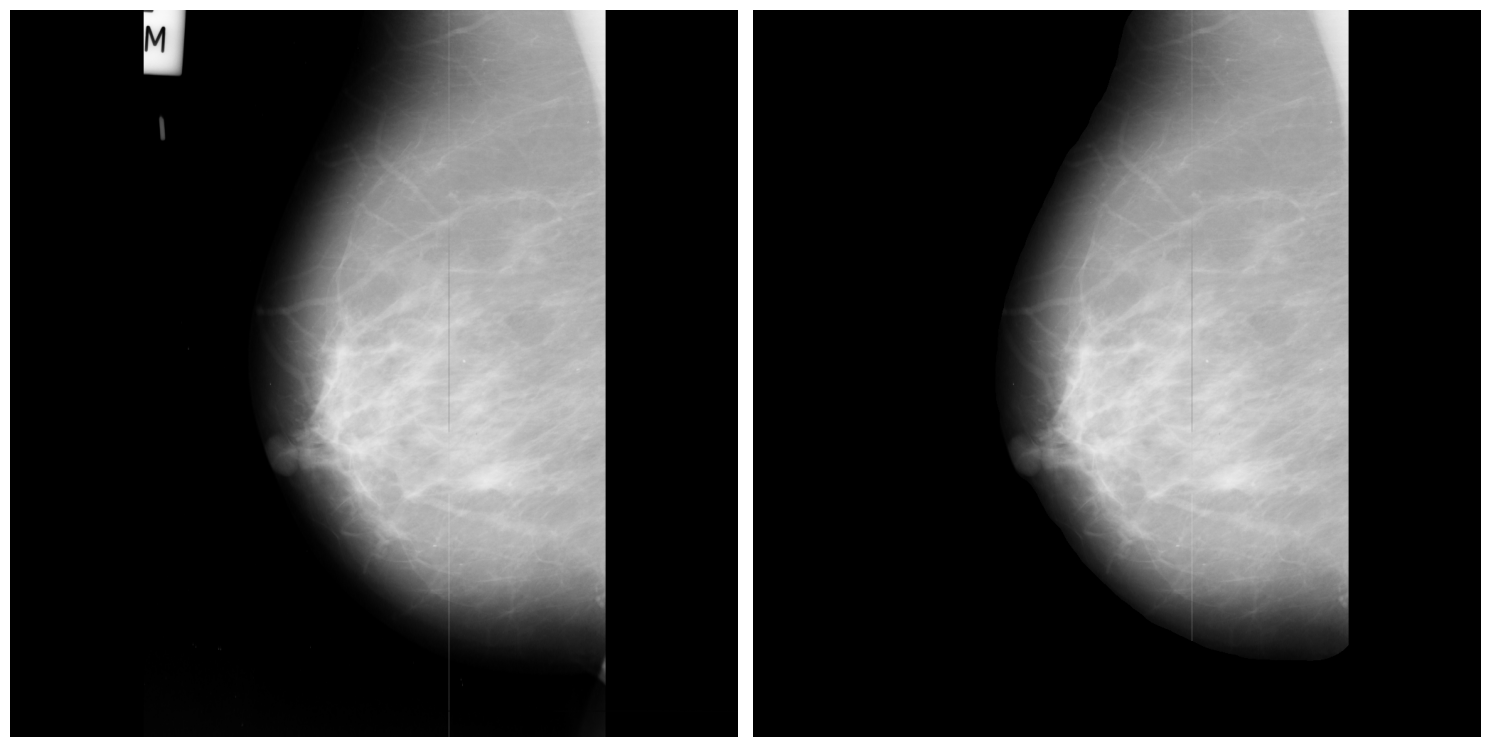

 87%|████████▋ | 13/15 [07:23<01:10, 35.07s/it]

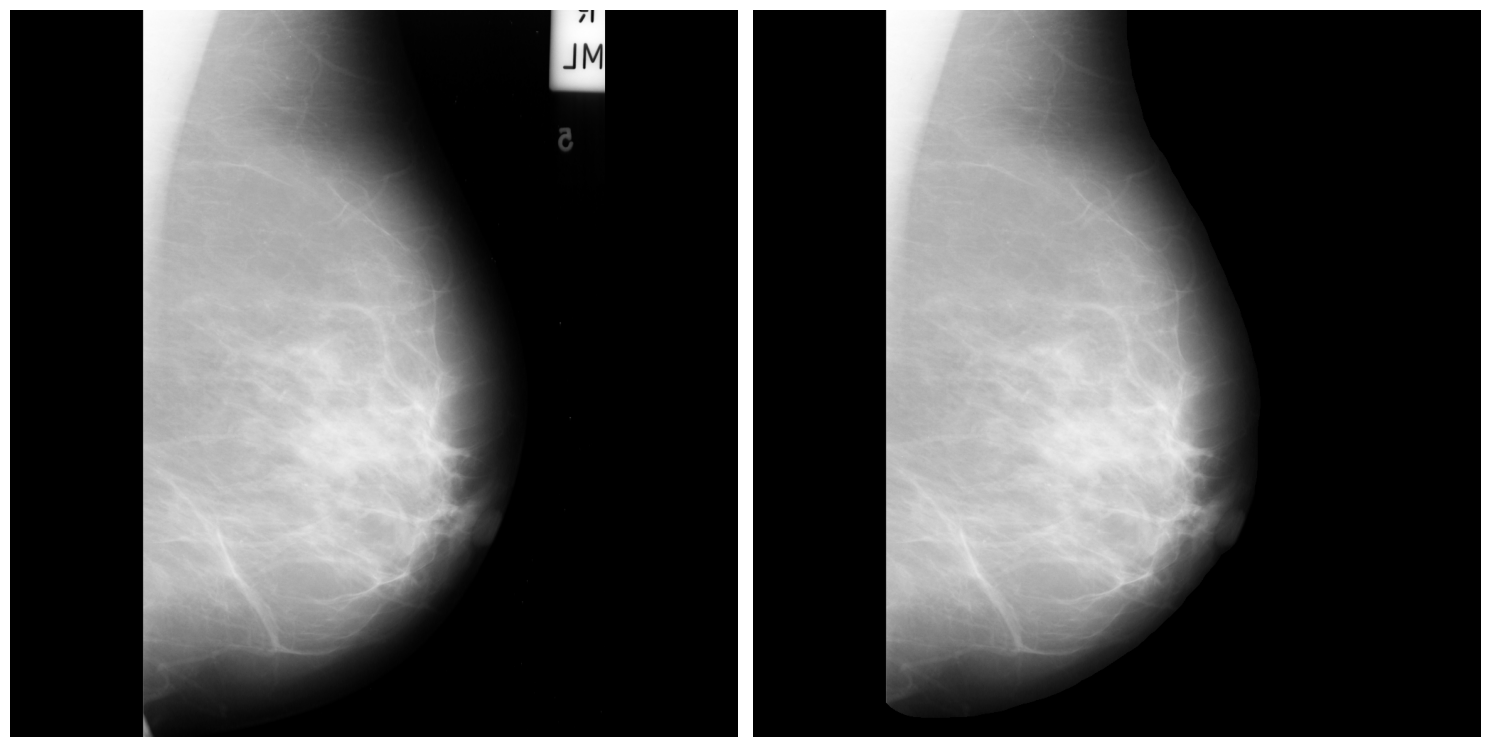

 93%|█████████▎| 14/15 [08:01<00:36, 36.03s/it]

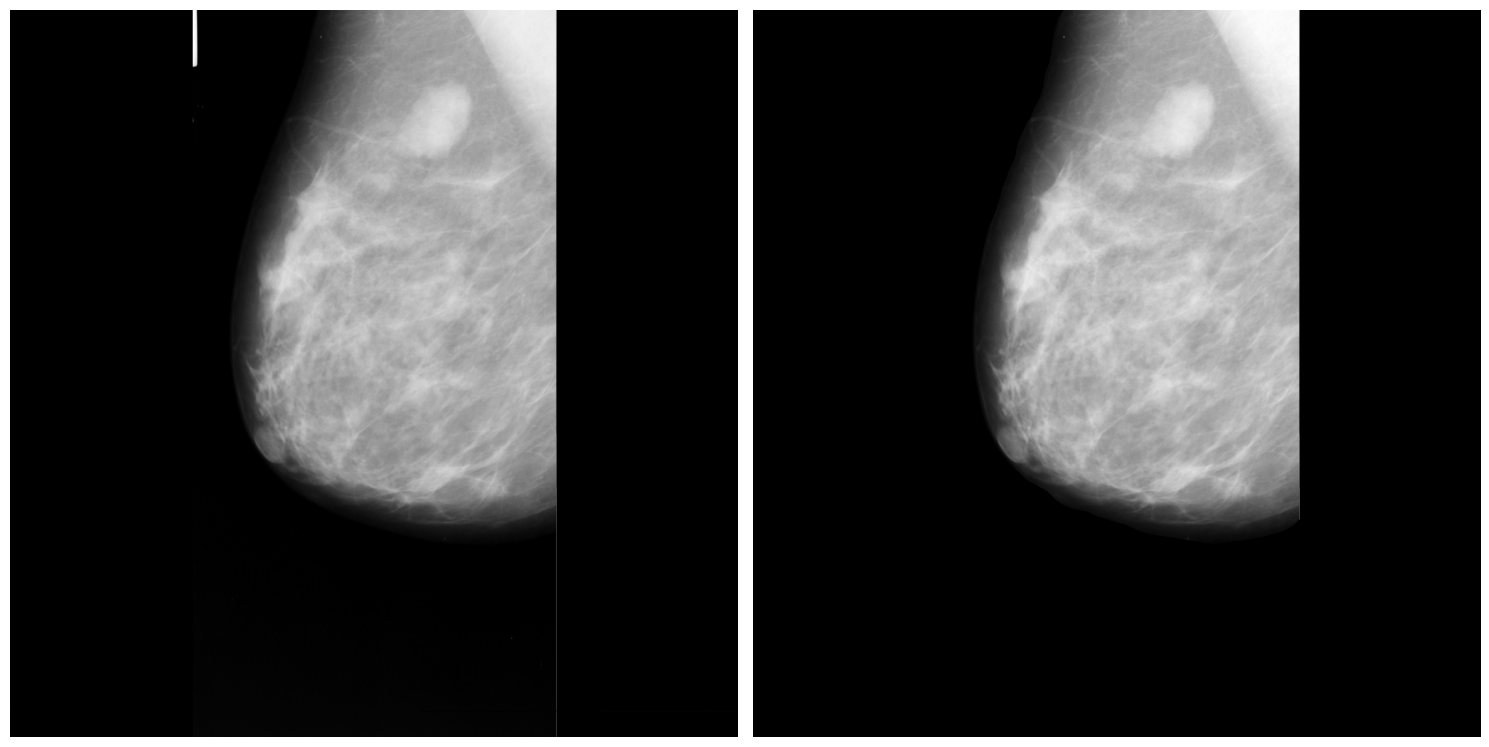

100%|██████████| 15/15 [08:39<00:00, 34.66s/it]


In [207]:
# First
breast_images_without_label = []

for i in tqdm(range(15)):
    image = breast_images[i]

    masked_image = remove_label(image)
    breast_images_without_label += [masked_image]

    plt.figure(figsize=(15,10))

    plt.subplot(1,2,1)
    plt.imshow(np.array(image), cmap="grey")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(masked_image, cmap="grey")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

  0%|          | 0/15 [00:00<?, ?it/s]c:\Users\planc\Personnel\CentraleSupélec\OVO\Breast_cancer_detection\Sources\tools.py:65: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem1 = morphology.square(100)  # Structuring element, here a 3x3 square


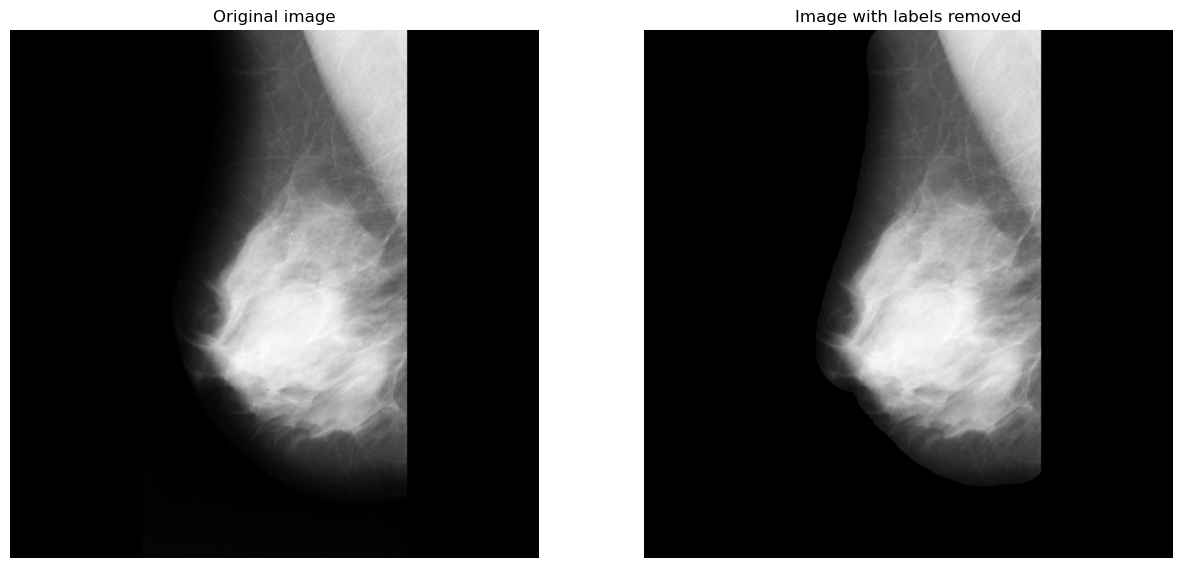

  7%|▋         | 1/15 [00:17<04:00, 17.15s/it]

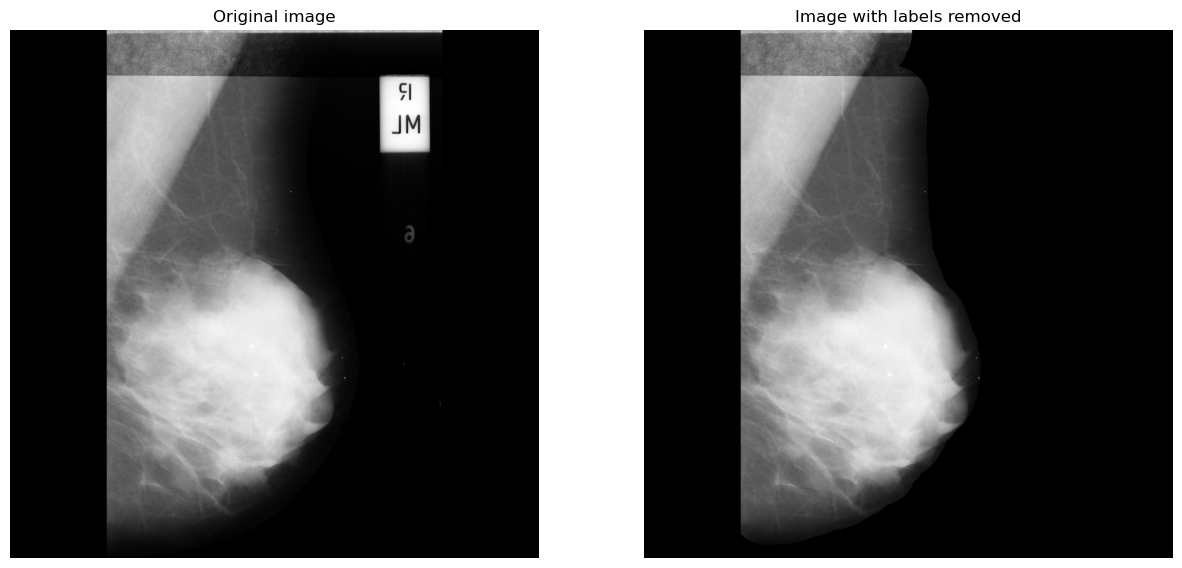

 13%|█▎        | 2/15 [00:34<03:43, 17.22s/it]

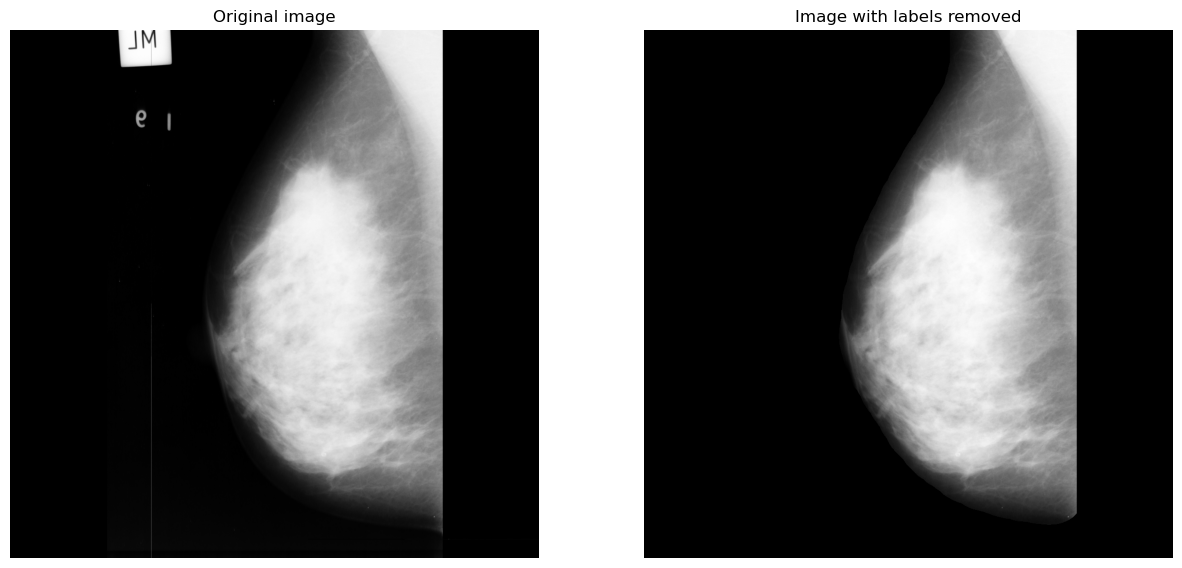

 20%|██        | 3/15 [00:53<03:38, 18.20s/it]

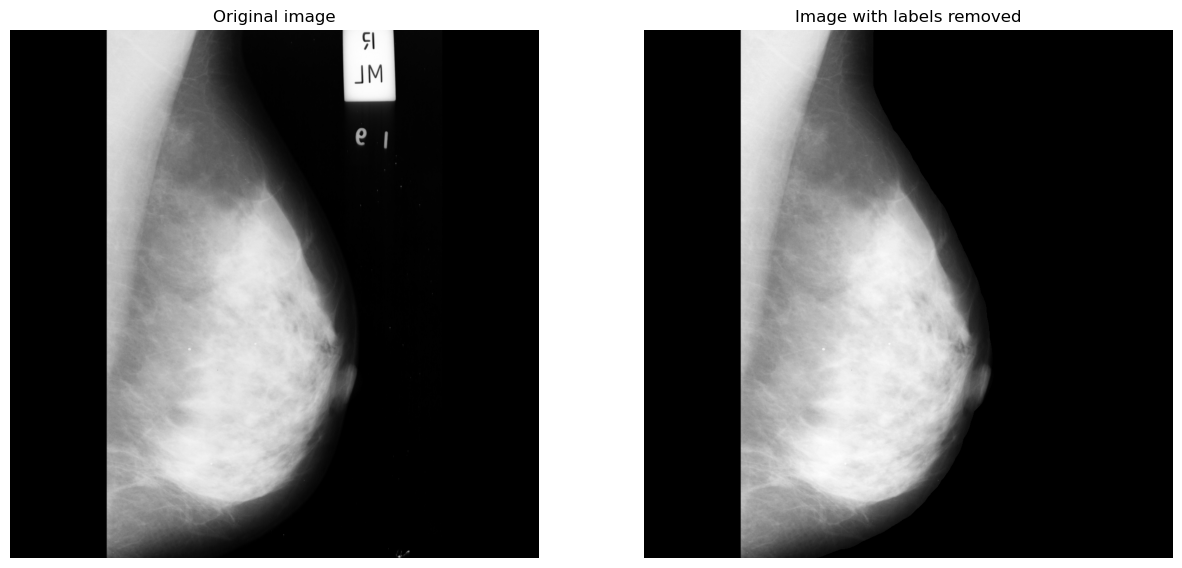

 27%|██▋       | 4/15 [01:12<03:24, 18.59s/it]

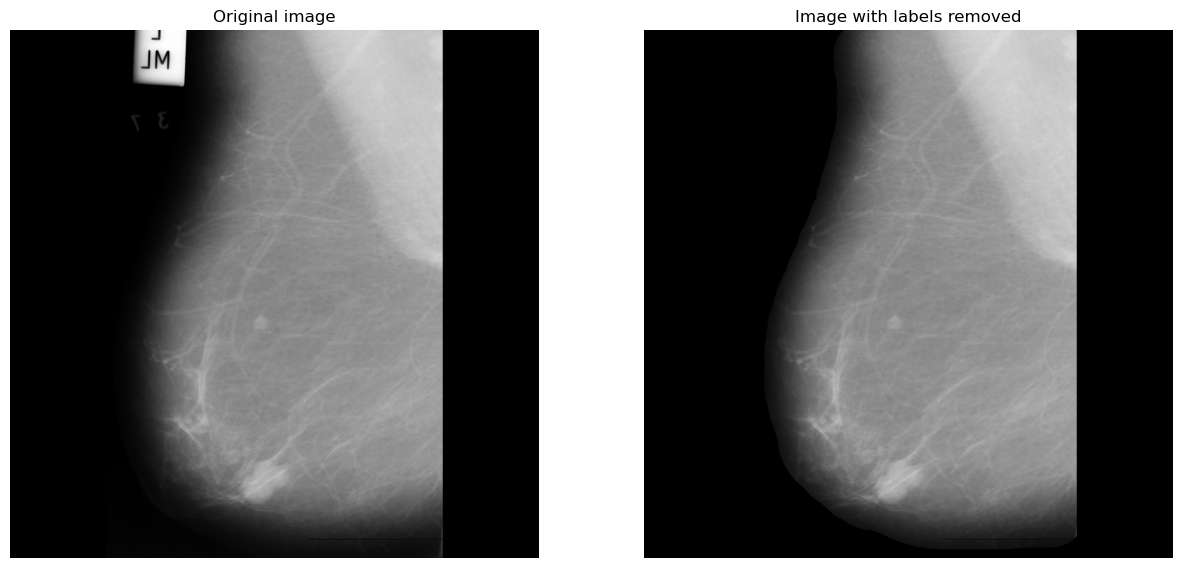

 33%|███▎      | 5/15 [01:30<03:01, 18.16s/it]

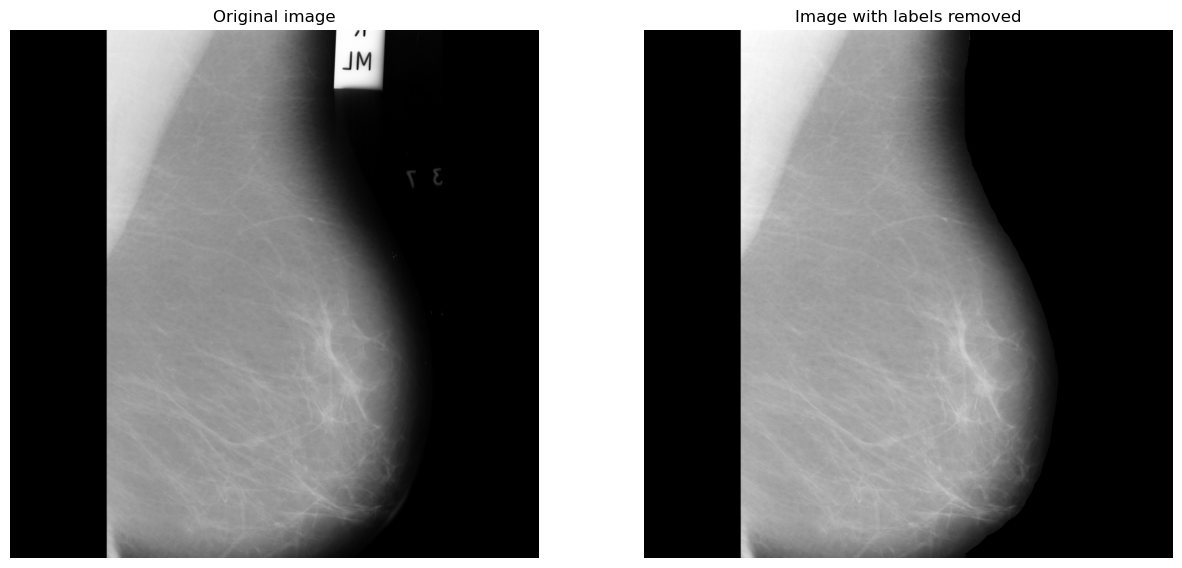

 40%|████      | 6/15 [01:47<02:41, 17.96s/it]

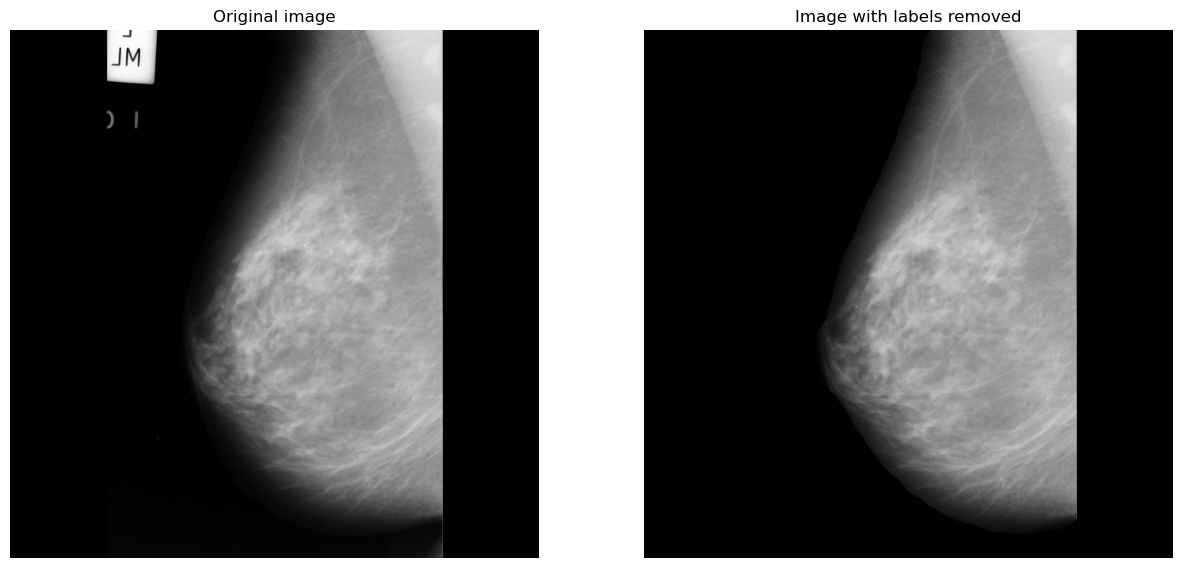

 47%|████▋     | 7/15 [02:05<02:22, 17.87s/it]

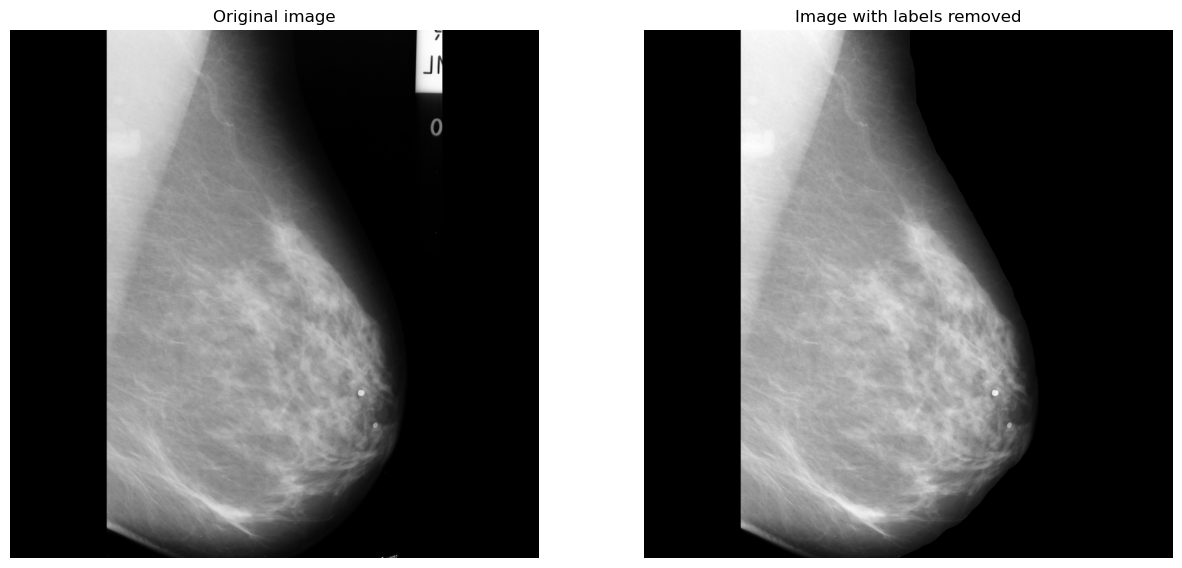

 53%|█████▎    | 8/15 [02:23<02:05, 17.94s/it]

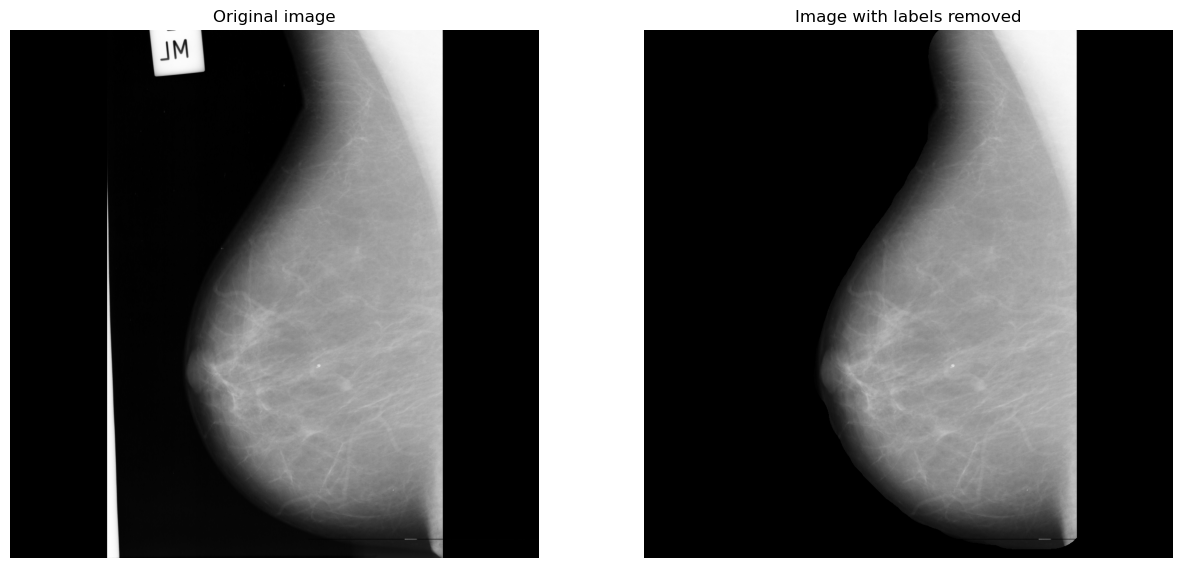

 60%|██████    | 9/15 [02:41<01:47, 18.00s/it]

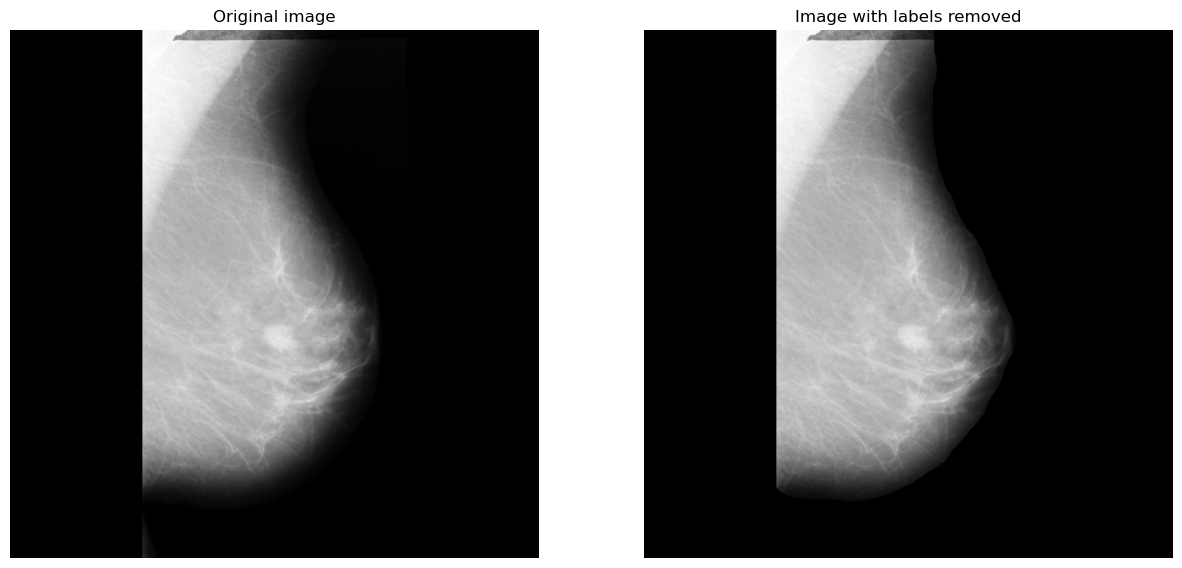

 67%|██████▋   | 10/15 [03:00<01:30, 18.10s/it]

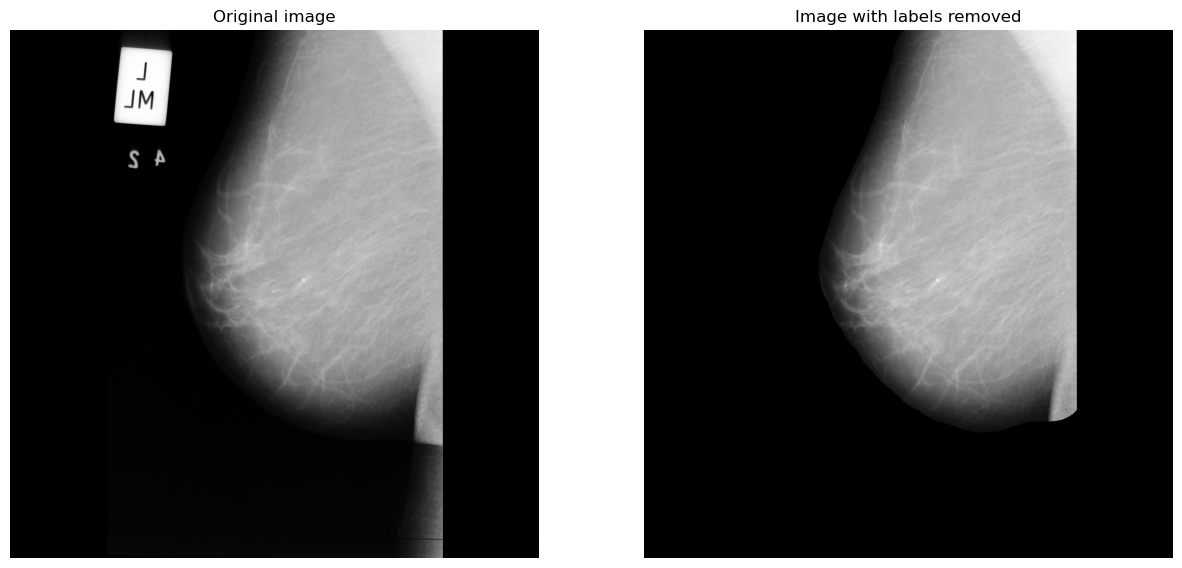

 73%|███████▎  | 11/15 [03:18<01:12, 18.11s/it]

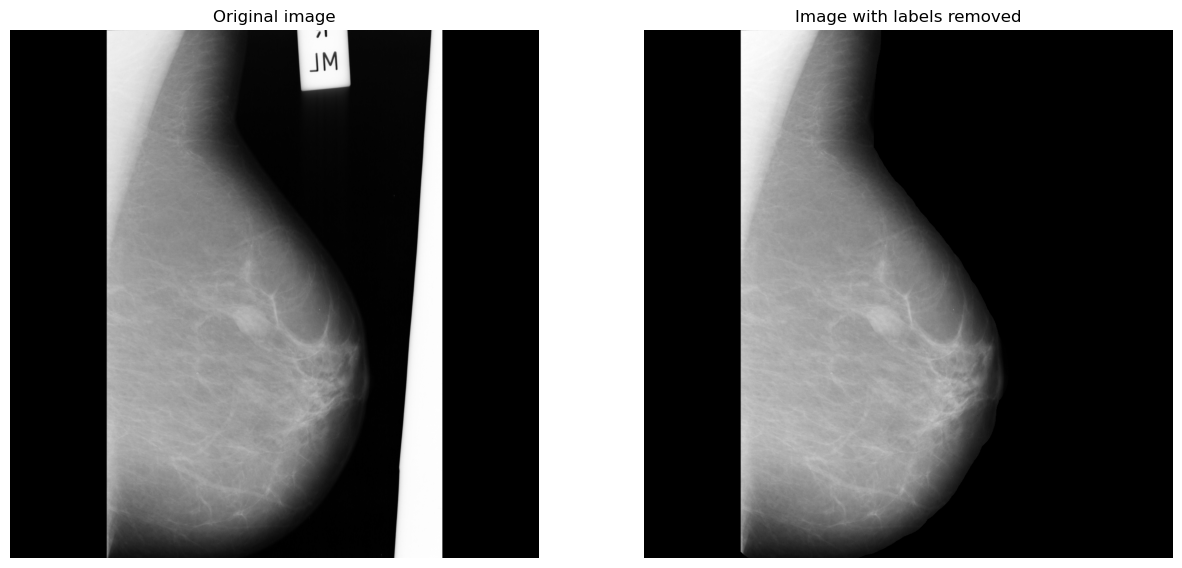

 80%|████████  | 12/15 [03:35<00:53, 17.88s/it]

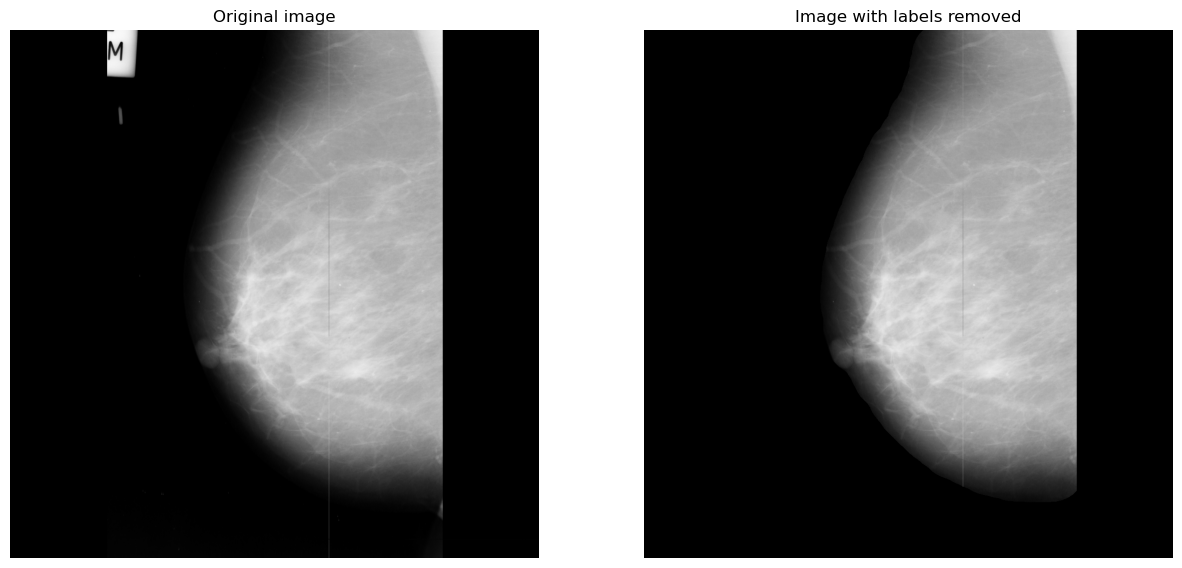

 87%|████████▋ | 13/15 [03:53<00:35, 17.88s/it]

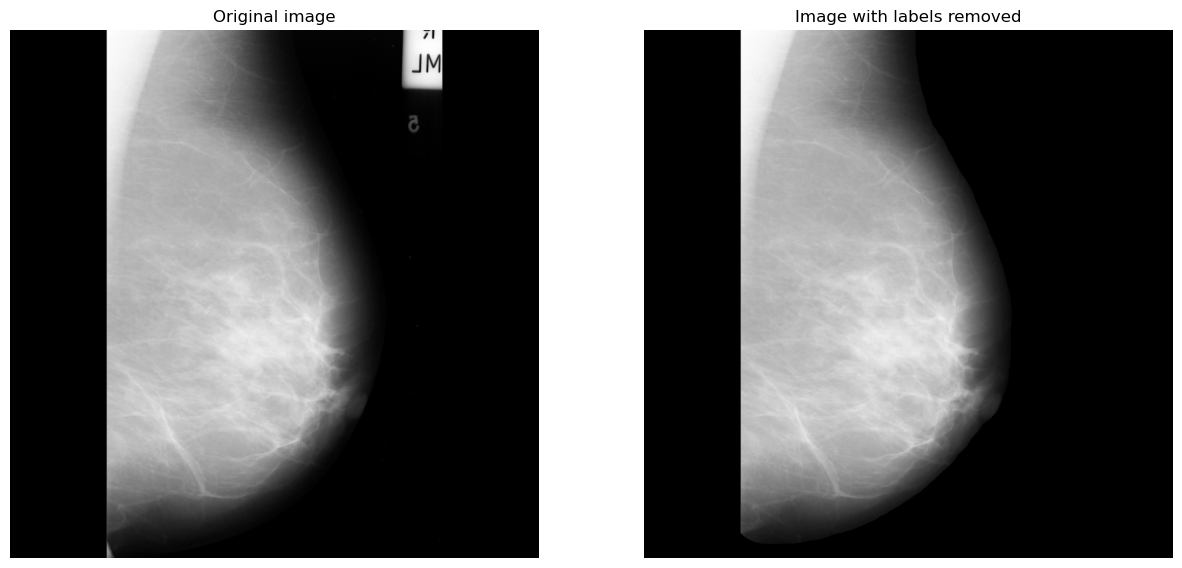

 93%|█████████▎| 14/15 [04:11<00:17, 17.82s/it]

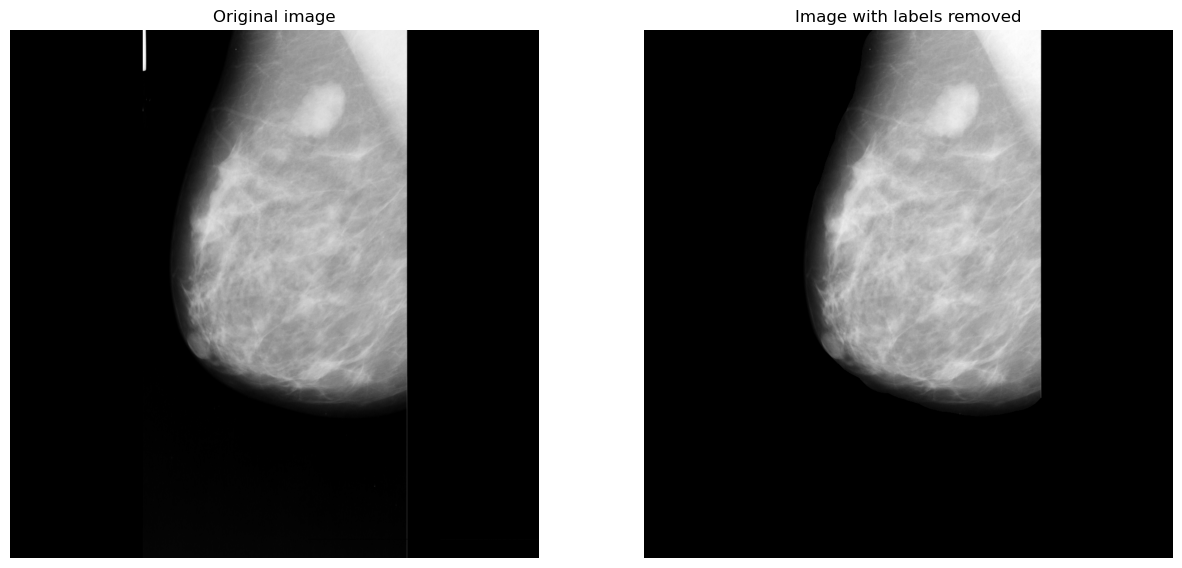

100%|██████████| 15/15 [04:28<00:00, 17.93s/it]


In [4]:
breast_images_without_label = []

for i in tqdm(range(15)):
    image = breast_images[i]

    masked_image = remove_label(image)
    breast_images_without_label += [masked_image]

    plt.figure(figsize=(15,10))

    plt.subplot(1,2,1)
    plt.imshow(np.array(image), cmap="grey")
    plt.title("Original image")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(masked_image, cmap="grey")
    plt.title("Image with labels removed")
    plt.axis('off')

    plt.show()

# np.save('images_without_label.npy', breast_images_without_label)

In [209]:
# Fonction parallèle pour traiter une seule image
def process_image(image):
    return remove_label(image)

# Liste des images à traiter
breast_images_without_label = []

# Parallélisation
with ThreadPoolExecutor() as executor:
    # Map des images avec la fonction `remove_label` tout en préservant l'ordre
    results = list(tqdm(executor.map(process_image, breast_images), total=len(breast_images)))

# Conserver les résultats dans un fichier .npy
np.save('images_without_label_1_step_morpho.npy', results)

C:\Users\planc\AppData\Local\Temp\ipykernel_25224\1018889455.py:23: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem1 = morphology.square(100)  # Structuring element, here a 3x3 square
100%|██████████| 322/322 [17:42<00:00,  3.30s/it]


In [75]:
breast_images_without_label = np.load('images_without_label.npy', allow_pickle=True)